<a href="https://colab.research.google.com/github/NigelGoh16/Customer_Segmentation_Clustering/blob/main/Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Imports

In [ ]:
zipF<- "/content/archive (1).zip"
outDir<-"/content/"
unzip(zipF,exdir=outDir)

In [ ]:
data <- read.csv("earning_detais.csv")

# Data Exploration

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
head(data)

,X_id,job_id,customer_user_id,technician_user_id,total_amount,commision,amount_earned,transaction_type,createdAt,updatedAt
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
1,bd_zxfjYpvYrEbF4QY2B,job_xZeTT3QMa6utQSnzF,usr_yikuhp2TjFz7wvuue,usr_7AQBCXKhDpmBe3Cig,195.00,22,152.100,Credit Card,2022-04-22T06:10:09.536Z,2022-04-22T06:10:09.536Z
2,bd_zu7vQix3hPTXpfC4t,job_gg8mjdmXc2w7pRrDS,usr_AMz6q6S7nDTG9tGSQ,usr_7AQBCXKhDpmBe3Cig,0.00,22,0.000,Credit Card,2022-03-09T07:42:36.843Z,2022-03-09T07:42:36.843Z
3,bd_ztgrWDtZQBmaN4qYQ,job_WAcAnS3Fxyk7CJdRQ,usr_3daokKGJoCTD6xJcb,usr_v48Kfzjs3p59895tX,60.00,88,7.200,Credit Card,2023-03-30T10:06:01.169Z,2023-03-30T10:06:01.169Z
4,bd_zsHYs8c2W5NwHRLzB,job_QsTcCgc3kjM3KyoC8,usr_ArMAnz9oL9WMQq3ax,usr_7AQBCXKhDpmBe3Cig,NA,22,0.000,Credit Card,2022-02-09T07:07:40.943Z,2022-02-09T07:07:40.943Z
5,bd_zs8nmoHnkkjFqTe6d,job_xYnQy9KC3WZWQ4pJQ,usr_MijoHcC7hfbRzkmBq,usr_MPtYAKXcqBvmciqRE,4.39,110,-0.439,Credit Card,2021-10-25T09:42:18.676Z,2021-10-25T09:42:18.676Z
6,bd_zr9AjigWPZcGjhJmv,job_QsTcCgc3kjM3KyoC8,usr_ArMAnz9oL9WMQq3ax,usr_7AQBCXKhDpmBe3Cig,NA,22,0.000,Credit Card,2022-02-09T07:07:28.101Z,2022-02-09T07:07:28.101Z


## Data Frequency

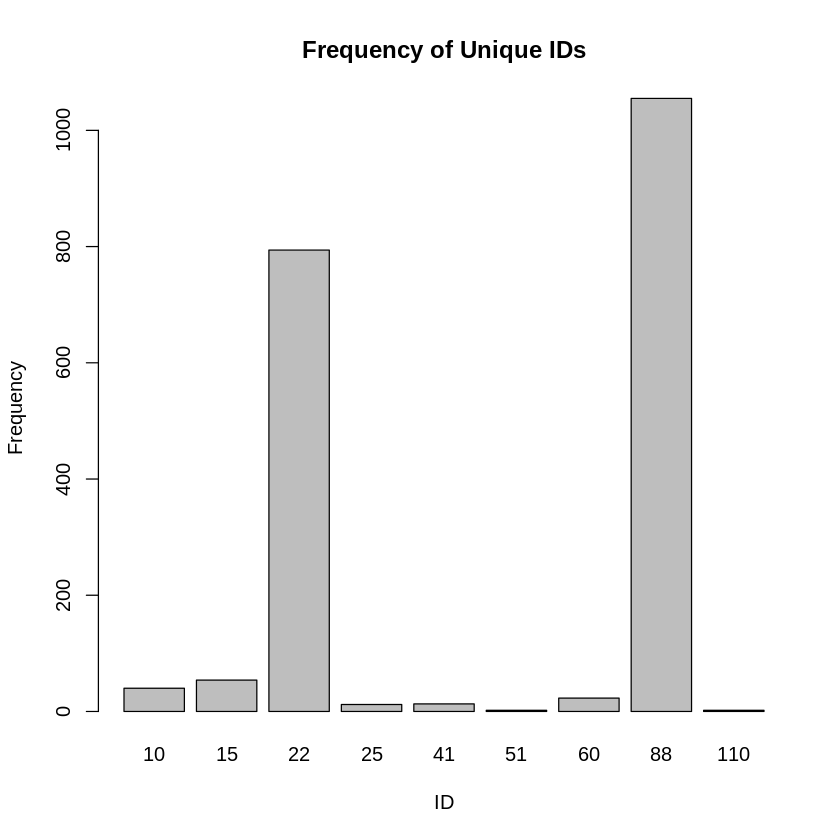

In [ ]:
id_frequencies <- xtabs(~ commision, data = data)
barplot(id_frequencies, main = "Frequency of Unique IDs", xlab = "ID", ylab = "Frequency")
# print(id_frequencies)

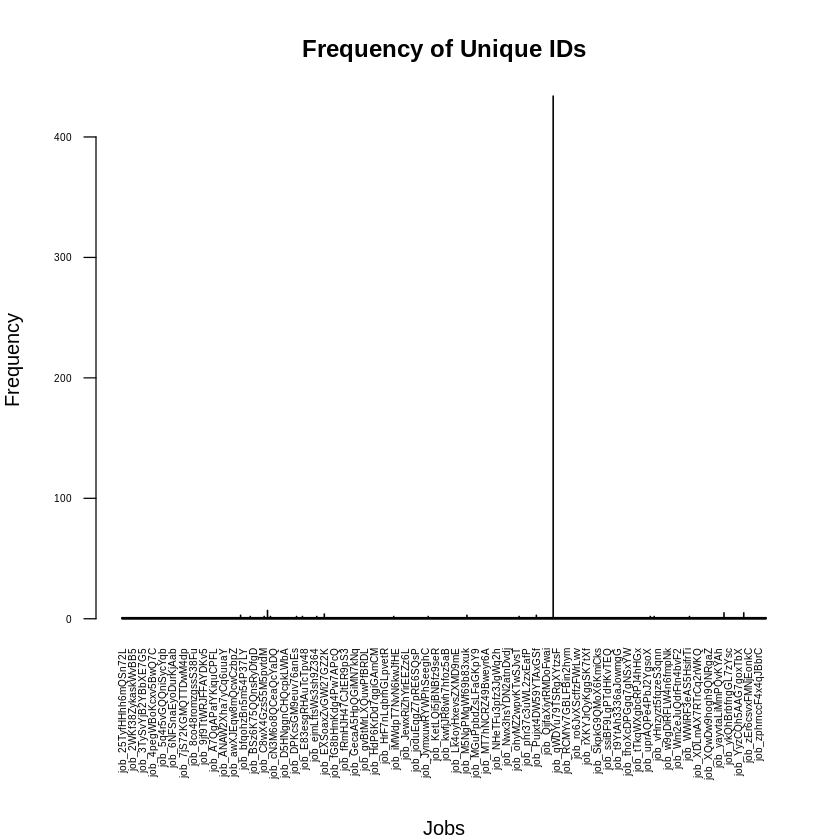

In [ ]:
id_frequencies <- xtabs(~ job_id, data = data)
par(las = 2, cex.axis = 0.5, mar = c(9, 4, 4, 2))
barplot(id_frequencies, main = "Frequency of Unique IDs", ylab = "Frequency")
title(xlab = "Jobs", line = 8)
# print(id_frequencies)

In [ ]:
id_frequencies_df <- as.data.frame(id_frequencies)
filtered_id <- id_frequencies_df[id_frequencies_df$Freq > 400, ]
print(filtered_id)

                    job_id Freq
1026 job_QsTcCgc3kjM3KyoC8  434


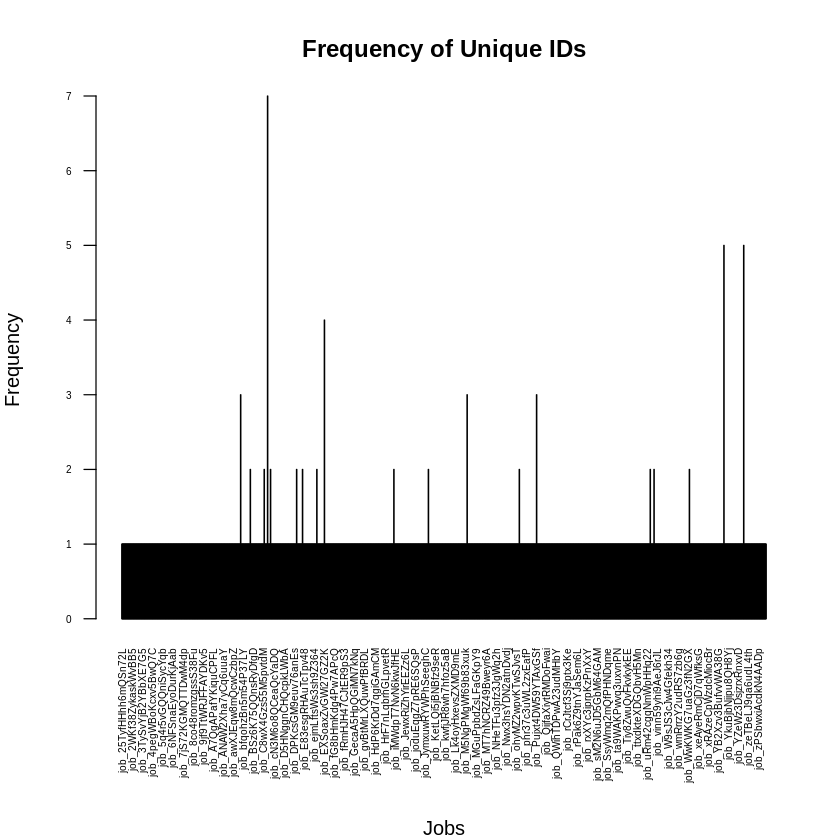

In [ ]:
filtered_data <- data[data$job_id %in% id_frequencies_df$job_id[id_frequencies_df$Freq < 400], ]
filtered_id_frequencies <- xtabs(~ job_id, data = filtered_data)
par(las = 2, cex.axis = 0.5, mar = c(9, 4, 4, 2))
barplot(filtered_id_frequencies, main = "Frequency of Unique IDs", ylab = "Frequency")
title(xlab = "Jobs", line = 8)

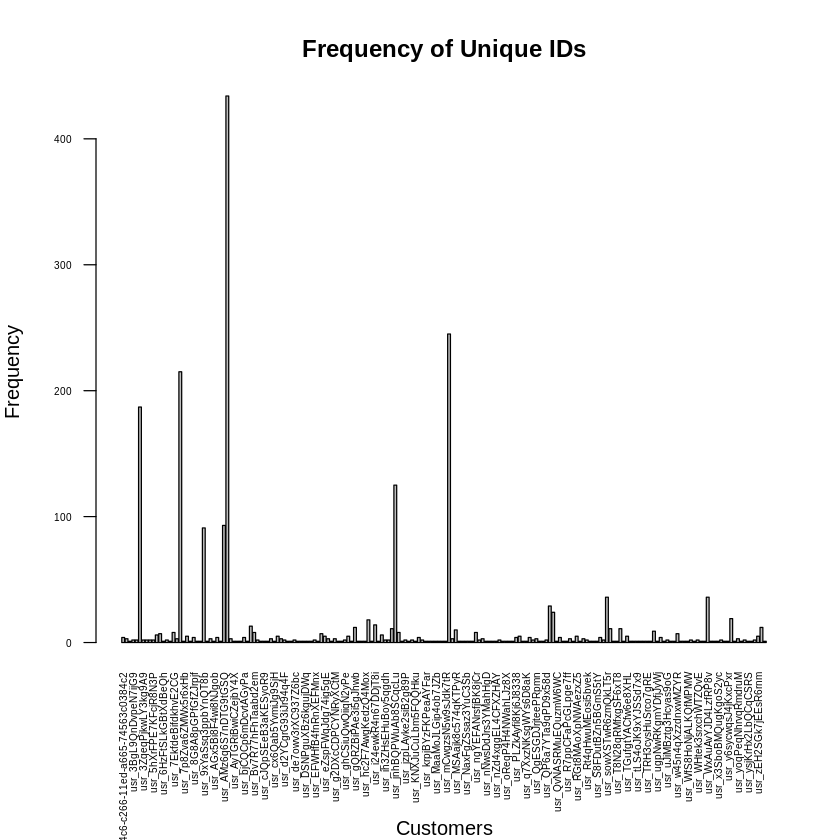

In [ ]:
id_frequencies <- xtabs(~ customer_user_id, data = data)
par(las = 2, cex.axis = 0.5, mar = c(8, 4, 4, 2))
barplot(id_frequencies, main = "Frequency of Unique IDs", ylab = "Frequency")
title(xlab = "Customers", line = 7)
# print(id_frequencies)

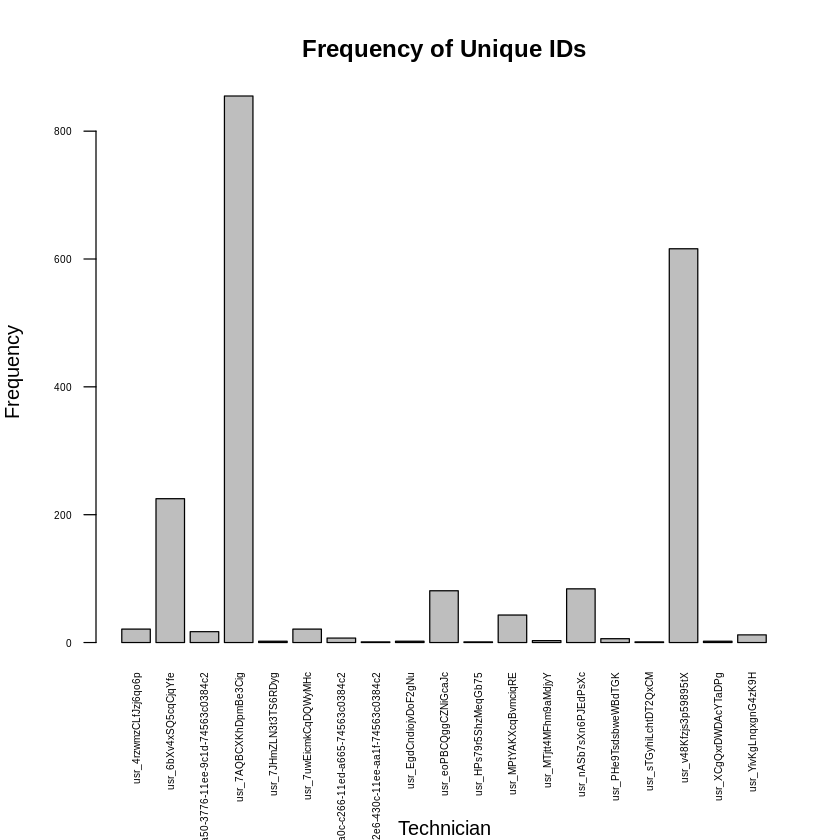

In [ ]:
id_frequencies <- xtabs(~ technician_user_id, data = data)
par(las = 2, cex.axis = 0.5, mar = c(8, 4, 4, 2))
barplot(id_frequencies, main = "Frequency of Unique IDs", ylab = "Frequency")
title(xlab = "Technician", line = 7)
# print(id_frequencies)

transaction_type
            Credit Card        Visa 
          2        1536          21 


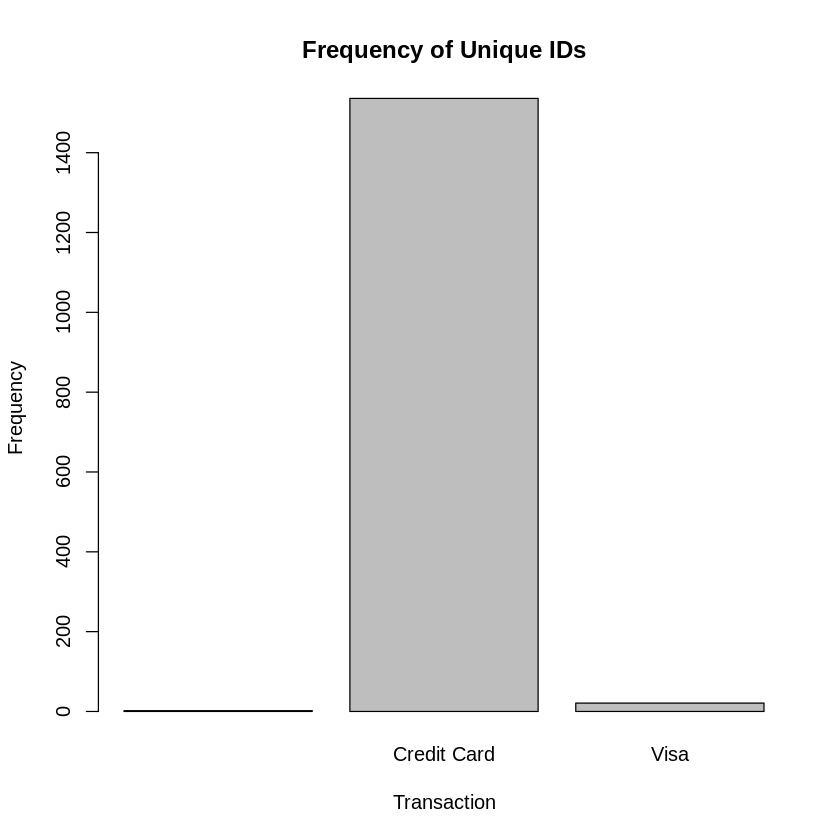

In [ ]:
id_frequencies <- xtabs(~ transaction_type, data = data)
barplot(id_frequencies, main = "Frequency of Unique IDs", xlab = "Transaction", ylab = "Frequency")
print(id_frequencies)

## Data Cleaning

In [ ]:
data <- na.omit(data)

In [ ]:
colSums(is.na(data))

X_id             job_id   customer_user_id technician_user_id 
                 0                  0                  0                  0 
      total_amount          commision      amount_earned   transaction_type 
                 0                  0                  0                  0 
         createdAt          updatedAt 
                 0                  0

In [ ]:
summary(data)

     X_id              job_id          customer_user_id   technician_user_id
 Length:1559        Length:1559        Length:1559        Length:1559       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
  total_amount       commision      amount_earned      transaction_type  
 Min.   :  -5.00   Min.   : 10.00   Min.   :  -0.439   Length:1559       
 1st Qu.:   0.00   1st Qu.: 22.00   1st Qu.:   0.000   Class :character  
 Median :  12.00   Median : 88.00   Median :   1.440   Mode  :character  
 Mean   :  27.52   Mean   : 67.01   Mean   :  10.532                     
 3rd Qu.:  24.00   3rd Qu.: 88.00   3rd Qu.:   3.550                     
 Max.   :6520.00 

## Label Encoding

In [ ]:
categorical_features <- c("X_id", "job_id", "customer_user_id", "technician_user_id", "transaction_type")
data[categorical_features] <- lapply(data[categorical_features], factor)  # Convert specified columns

In [ ]:
must_convert<-sapply(data,is.factor)       # logical vector telling if a variable needs to be displayed as numeric
data[must_convert]<-sapply(data[,must_convert],unclass)    # data.frame of all categorical variables now displayed as numeric
data <- data[, -c(9, 10)]   # remove unnecessary columns
head(data)

,X_id,job_id,customer_user_id,technician_user_id,total_amount,commision,amount_earned,transaction_type
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
1,1555,1401,181,4,195.00,22,152.100,2
2,1550,554,31,4,0.00,22,0.000,2
3,1548,1291,6,17,60.00,88,7.200,2
5,1545,1399,97,12,4.39,110,-0.439,2
7,1542,1208,127,1,12.00,88,1.440,2
8,1544,294,6,17,12.00,88,1.440,2


# Data Modeling

In [ ]:
install.packages("factoextra")
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
kmeans(data, centers=3, iter.max=100, nstart=100)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 77950)”


K-means clustering with 3 clusters of sizes 490, 603, 466

Cluster means:
       X_id    job_id customer_user_id technician_user_id total_amount
1 1069.2816  340.4531         69.95918          10.151020     20.35900
2  314.4196  792.8574         70.78939          10.386401     21.09624
3 1078.2768 1169.0601         66.65665           9.727468     43.35902
  commision amount_earned transaction_type
1  66.74286      7.487844         2.008163
2  67.19569      7.335419         2.006633
3  67.03433     17.869963         2.023605

Clustering vector:
   1    2    3    5    7    8    9   10   11   12   13   15   16   17   20   21 
   3    1    3    3    3    1    1    1    1    1    1    3    3    1    1    1 
  23   24   26   27   28   30   31   32   33   35   36   37   40   41   42   43 
   3    3    1    3    1    3    1    3    3    1    3    1    3    1    1    1 
  44   45   46   47   48   49   51   52   54   55   56   57   58   59   60   62 
   1    1    3    3    3    1    3    1    3 

## Centroid Optimization

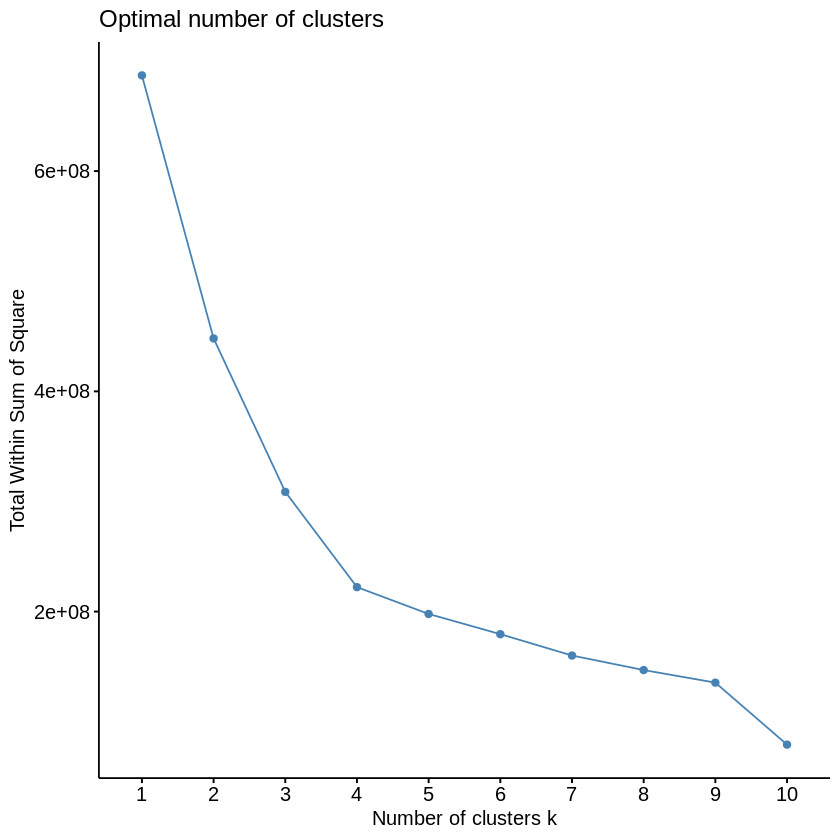

In [ ]:
fviz_nbclust(x=data, FUNcluster=kmeans, method = 'wss')

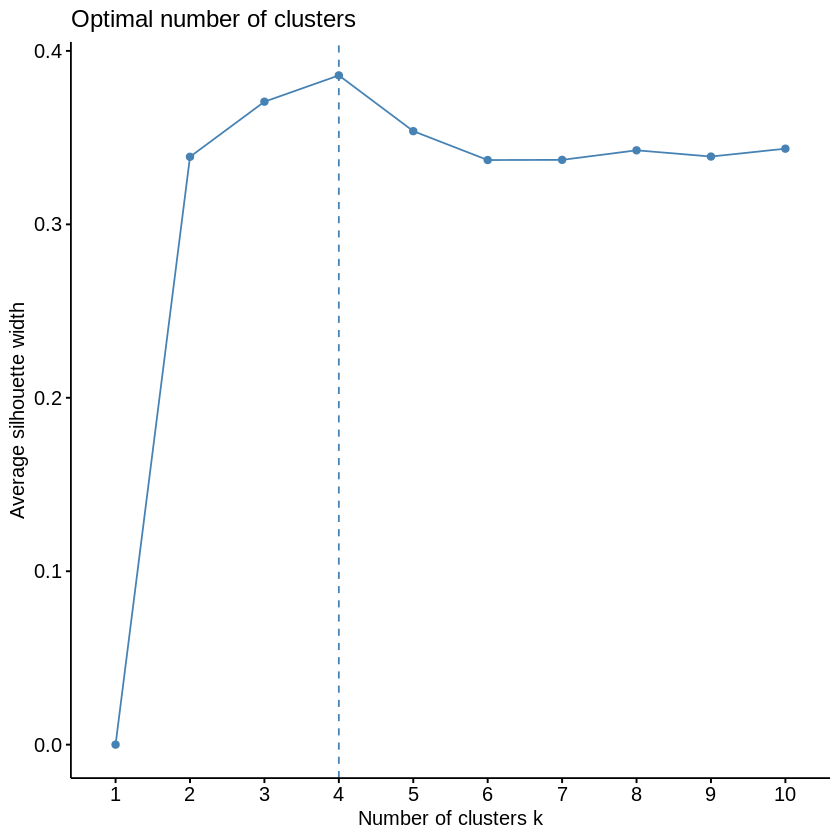

In [ ]:
fviz_nbclust(x=data, FUNcluster=kmeans, method = 'silhouette')

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


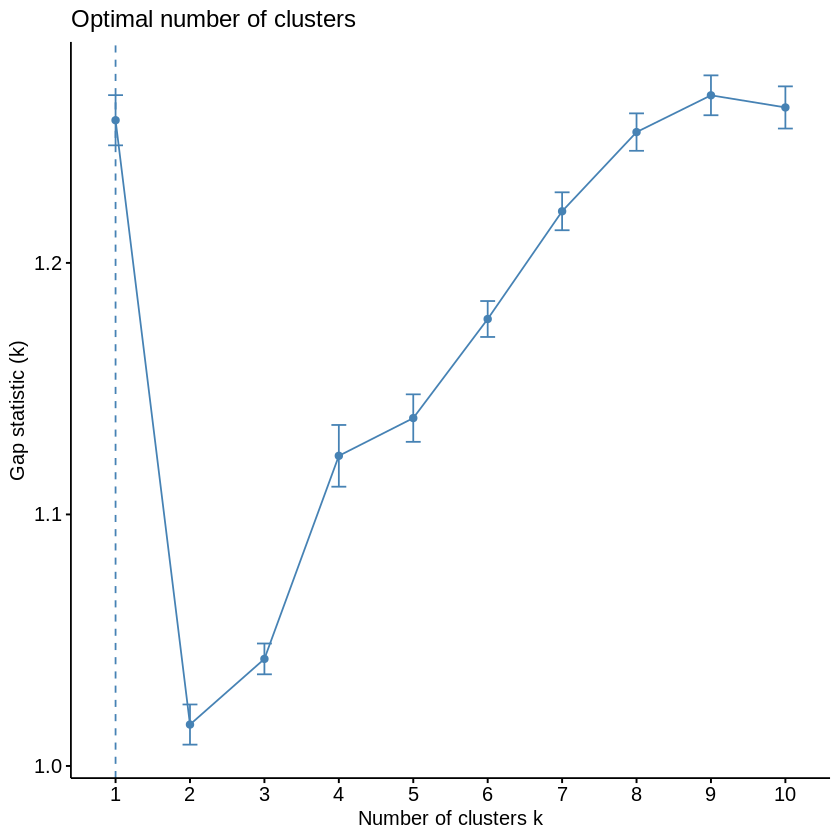

In [ ]:
fviz_nbclust(x=data, FUNcluster=kmeans, method = 'gap_stat')

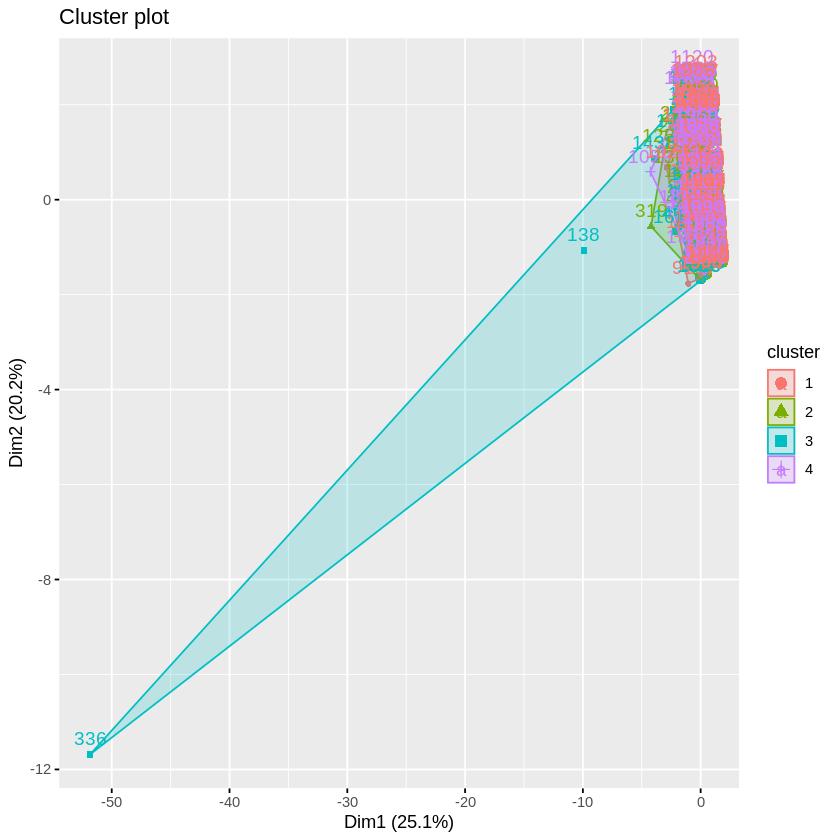

In [ ]:
fviz_cluster(kmeans(data, algorithm="Lloyd", centers=4, iter.max=100, nstart=100), data=data)

## Data Scaling

In [ ]:
scaled_data <- data
scaled_data$X_id <- scale(data$X_id)
scaled_data$job_id <- scale(data$job_id)
scaled_data$customer_user_id <- scale(data$customer_user_id)
scaled_data$technician_user_id <- scale(data$technician_user_id)
scaled_data$transaction_type <- scale(data$transaction_type)
head(scaled_data)

## Data Cleaning

Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”


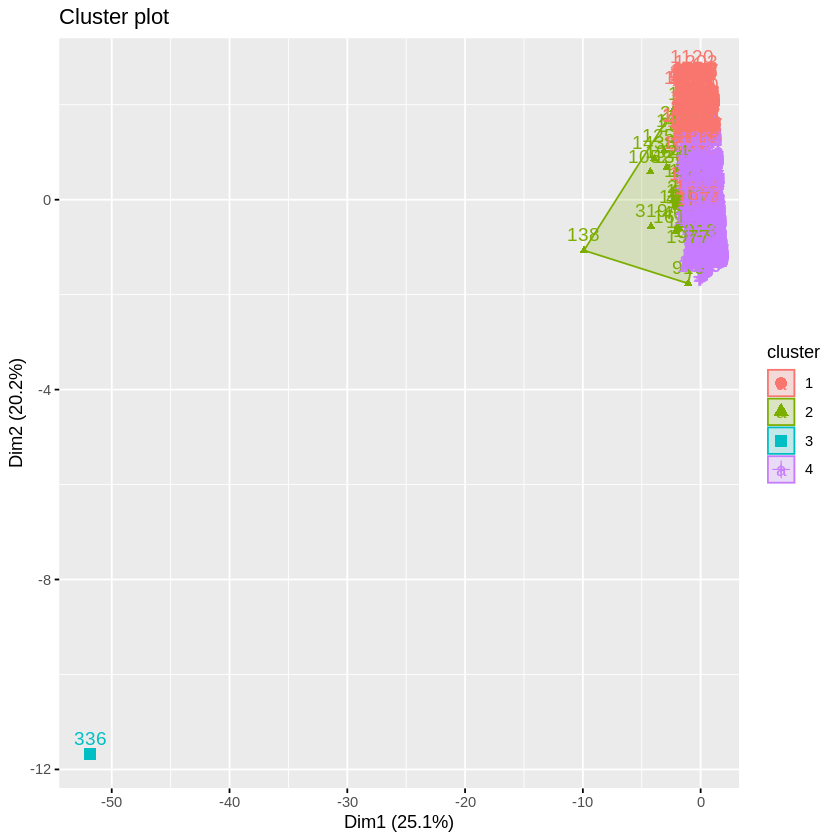

In [ ]:
fviz_cluster(kmeans(scaled_data, algorithm="Lloyd", centers=4, iter.max=100, nstart=100), data=scaled_data)
kmeans_results <- kmeans(scaled_data, algorithm="Lloyd", centers=4, iter.max=100, nstart=100)
cluster_assignments <- kmeans_results$cluster

In [ ]:
cluster3_indices <- which(cluster_assignments == 4)
cluster3_indices

336 
266

In [ ]:
new_data <- scaled_data[-266, ]

Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”


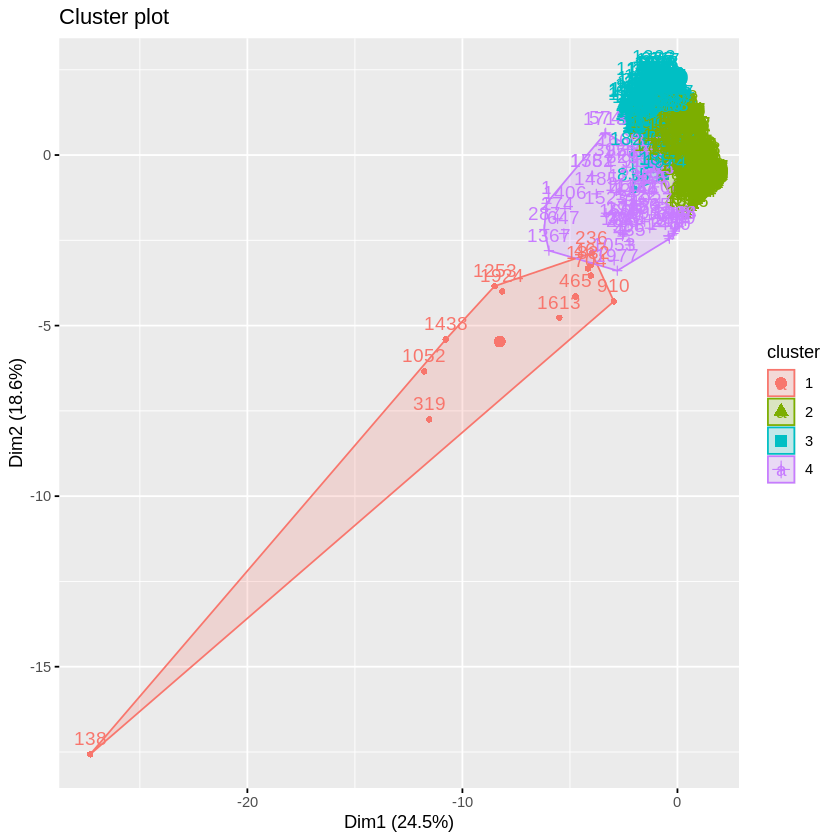

In [ ]:
fviz_cluster(kmeans(new_data, algorithm="Lloyd", centers=4, iter.max=100, nstart=100), data=new_data)

In [ ]:
kmeans_results <- kmeans(new_data, algorithm="Lloyd", centers=4, iter.max=100, nstart=100)
cluster_assignments <- kmeans_results$cluster
cluster3_indices <- which(cluster_assignments == 3)
cluster3_indices

Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”


138  236  319  465  467  704  910 1052 1253 1438 1613 1832 1924 
 106  183  251  365  366  556  710  819  973 1128 1261 1431 1507

In [ ]:
new_data <- new_data[-106, ]

Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”


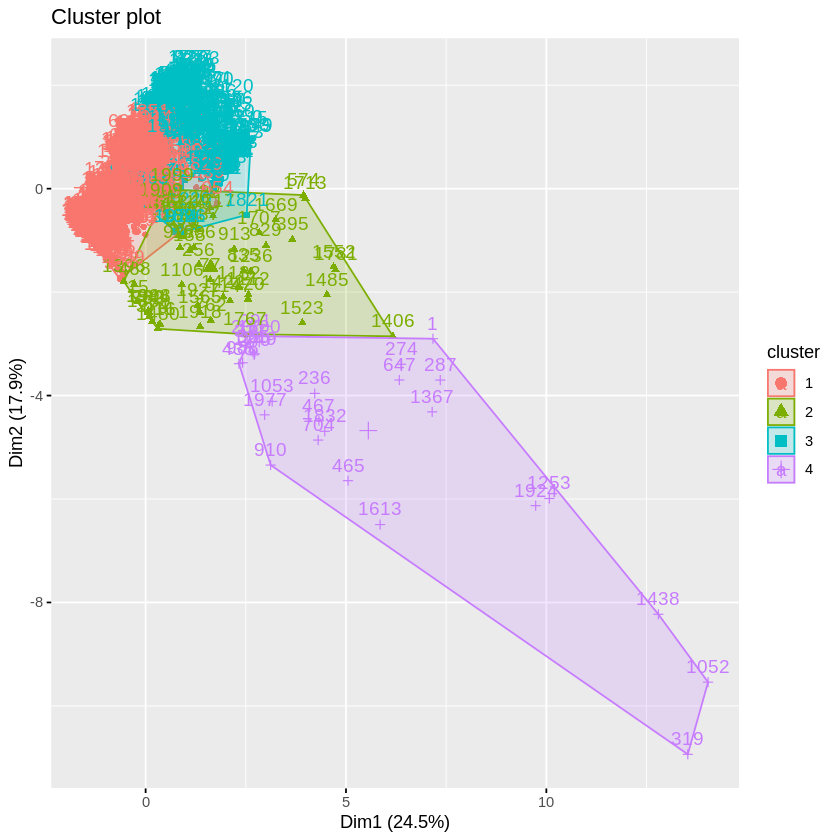

In [ ]:
fviz_cluster(kmeans(new_data, algorithm="Lloyd", centers=4, iter.max=100, nstart=100), data=new_data)

In [ ]:
kmeans_results <- kmeans(new_data, algorithm="Lloyd", centers=4, iter.max=100, nstart=100)
cluster_assignments <- kmeans_results$cluster  # Assuming you have cluster assignments

Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”
Warning message:
“empty cluster: try a better set of initial centers”


In [ ]:
# clusters_to_keep <- c(1, 3)  # Specify clusters to include
cluster1 <- data[cluster_assignments %in% 1,]
cluster1

,X_id,job_id,customer_user_id,technician_user_id,total_amount,commision,amount_earned,transaction_type
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
1,1555,1401,181,4,195.00,22,152.1000,2
15,1522,1038,6,17,96.00,88,11.5200,2
32,1511,828,155,2,108.00,88,12.9600,2
77,1446,1246,25,2,156.00,88,18.7200,2
187,1256,1221,73,6,0.00,88,0.0000,2
199,1239,1495,81,2,15.00,88,1.8000,2
210,1261,401,69,4,0.00,22,0.0000,2
215,1255,630,174,10,10.80,88,1.2960,2
254,1219,95,6,10,12.00,88,1.4400,2


In [ ]:
cluster2 <- data[cluster_assignments %in% 2,]
cluster2

,X_id,job_id,customer_user_id,technician_user_id,total_amount,commision,amount_earned,transaction_type
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
3,1548,1291,6,17,60.00,88,7.200,2
5,1545,1399,97,12,4.39,110,-0.439,2
7,1542,1208,127,1,12.00,88,1.440,2
8,1544,294,6,17,12.00,88,1.440,2
10,1538,237,81,6,0.00,88,0.000,2
11,1533,246,46,14,15.00,88,1.800,2
12,1531,256,77,2,24.00,88,2.880,2
13,1529,151,6,17,0.00,88,0.000,2
16,1515,1482,25,2,12.00,88,1.440,2


In [ ]:
cluster3 <- data[cluster_assignments %in% 3,]
cluster3

,X_id,job_id,customer_user_id,technician_user_id,total_amount,commision,amount_earned,transaction_type
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
2,1550,554,31,4,0.00,22,0.0000,2
9,1541,342,97,4,0.00,22,0.0000,2
23,1543,1102,31,4,10.00,22,7.8000,2
24,1537,1091,97,4,0.00,22,0.0000,2
30,1514,1177,189,4,15.00,22,11.7000,2
31,1512,280,97,12,0.00,10,0.0000,2
35,1505,74,97,4,44.00,22,34.3200,2
41,1497,59,38,4,0.00,22,0.0000,2
45,1476,103,31,4,0.00,22,0.0000,2


In [ ]:
cluster4 <- data[cluster_assignments %in% 4,]
cluster4

,X_id,job_id,customer_user_id,technician_user_id,total_amount,commision,amount_earned,transaction_type
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
234,1218,280,97,12,0,10,0.00,2
272,1194,379,26,2,0,88,0.00,2
286,1155,1329,126,17,12,88,1.44,2
318,1121,1455,97,4,44,22,34.32,2
463,888,90,27,17,0,88,0.00,2
464,883,1002,152,17,24,88,2.88,2
702,529,314,123,2,12,88,1.44,2
908,215,1400,25,2,0,88,0.00,2
1050,122,896,18,17,12,88,1.44,2


# Data Understanding

## Cluster Summary

In [ ]:
summary(cluster1)

      X_id            job_id       customer_user_id technician_user_id
 Min.   :  46.0   Min.   :   8.0   Min.   :  6.00   Min.   : 2.000    
 1st Qu.: 425.0   1st Qu.: 531.0   1st Qu.: 18.00   1st Qu.: 4.000    
 Median : 923.0   Median : 850.0   Median : 73.00   Median : 4.000    
 Mean   : 822.6   Mean   : 834.7   Mean   : 64.77   Mean   : 9.279    
 3rd Qu.:1149.0   3rd Qu.:1175.0   3rd Qu.: 97.00   3rd Qu.:17.000    
 Max.   :1555.0   Max.   :1515.0   Max.   :181.00   Max.   :17.000    
  total_amount      commision     amount_earned    transaction_type
 Min.   :  0.00   Min.   :10.00   Min.   :  0.00   Min.   :2.000   
 1st Qu.:  0.00   1st Qu.:22.00   1st Qu.:  0.00   1st Qu.:2.000   
 Median : 12.00   Median :88.00   Median :  1.44   Median :2.000   
 Mean   : 35.01   Mean   :66.49   Mean   : 11.96   Mean   :2.016   
 3rd Qu.: 24.00   3rd Qu.:88.00   3rd Qu.:  6.00   3rd Qu.:2.000   
 Max.   :420.00   Max.   :88.00   Max.   :240.24   Max.   :3.000   

In [ ]:
summary(cluster2)

      X_id            job_id       customer_user_id technician_user_id
 Min.   :   8.0   Min.   :  86.0   Min.   :  6.00   Min.   : 2.000    
 1st Qu.: 372.0   1st Qu.: 498.0   1st Qu.: 18.00   1st Qu.: 4.000    
 Median : 865.0   Median : 828.0   Median : 81.00   Median : 4.000    
 Mean   : 776.4   Mean   : 815.9   Mean   : 66.47   Mean   : 9.211    
 3rd Qu.:1143.0   3rd Qu.:1168.0   3rd Qu.: 97.00   3rd Qu.:17.000    
 Max.   :1546.0   Max.   :1515.0   Max.   :174.00   Max.   :17.000    
  total_amount      commision     amount_earned     transaction_type
 Min.   :  0.00   Min.   :10.00   Min.   :  0.000   Min.   :2.000   
 1st Qu.:  0.00   1st Qu.:22.00   1st Qu.:  0.000   1st Qu.:2.000   
 Median : 12.00   Median :88.00   Median :  1.440   Median :2.000   
 Mean   : 29.87   Mean   :64.98   Mean   :  9.452   Mean   :2.018   
 3rd Qu.: 15.00   3rd Qu.:88.00   3rd Qu.:  2.880   3rd Qu.:2.000   
 Max.   :420.00   Max.   :88.00   Max.   :240.240   Max.   :3.000   

In [ ]:
summary(cluster3)

      X_id            job_id       customer_user_id technician_user_id
 Min.   :   1.0   Min.   :   1.0   Min.   :  1.00   Min.   : 1.000    
 1st Qu.: 387.5   1st Qu.: 342.0   1st Qu.: 20.25   1st Qu.: 4.000    
 Median : 777.5   Median : 725.5   Median : 81.00   Median : 6.000    
 Mean   : 777.0   Mean   : 726.8   Mean   : 72.29   Mean   : 9.443    
 3rd Qu.:1168.8   3rd Qu.:1136.2   3rd Qu.: 97.00   3rd Qu.:17.000    
 Max.   :1556.0   Max.   :1522.0   Max.   :190.00   Max.   :19.000    
  total_amount       commision      amount_earned     transaction_type
 Min.   :   0.00   Min.   : 10.00   Min.   :   0.00   Min.   :1.000   
 1st Qu.:   0.00   1st Qu.: 22.00   1st Qu.:   0.00   1st Qu.:2.000   
 Median :  12.00   Median : 88.00   Median :   1.44   Median :2.000   
 Mean   :  36.23   Mean   : 63.77   Mean   :  17.61   Mean   :2.015   
 3rd Qu.:  24.00   3rd Qu.: 88.00   3rd Qu.:   4.32   3rd Qu.:2.000   
 Max.   :6520.00   Max.   :110.00   Max.   :3846.80   Max.   :3.000   

In [ ]:
summary(cluster4)

      X_id            job_id       customer_user_id technician_user_id
 Min.   :   3.0   Min.   :   2.0   Min.   :  1.00   Min.   : 1.00     
 1st Qu.: 393.5   1st Qu.: 401.5   1st Qu.: 18.00   1st Qu.: 4.00     
 Median : 774.0   Median : 777.0   Median : 69.00   Median :12.00     
 Mean   : 780.1   Mean   : 775.3   Mean   : 68.32   Mean   :10.47     
 3rd Qu.:1175.5   3rd Qu.:1150.0   3rd Qu.: 97.00   3rd Qu.:17.00     
 Max.   :1559.0   Max.   :1524.0   Max.   :191.00   Max.   :19.00     
  total_amount      commision      amount_earned     transaction_type
 Min.   : -5.00   Min.   : 10.00   Min.   : -0.439   Min.   :1.000   
 1st Qu.:  0.00   1st Qu.: 22.00   1st Qu.:  0.000   1st Qu.:2.000   
 Median : 12.00   Median : 88.00   Median :  1.440   Median :2.000   
 Mean   : 23.56   Mean   : 68.49   Mean   :  7.431   Mean   :2.011   
 3rd Qu.: 24.00   3rd Qu.: 88.00   3rd Qu.:  3.240   3rd Qu.:2.000   
 Max.   :537.50   Max.   :110.00   Max.   :343.200   Max.   :3.000   

## Cluster Frequency

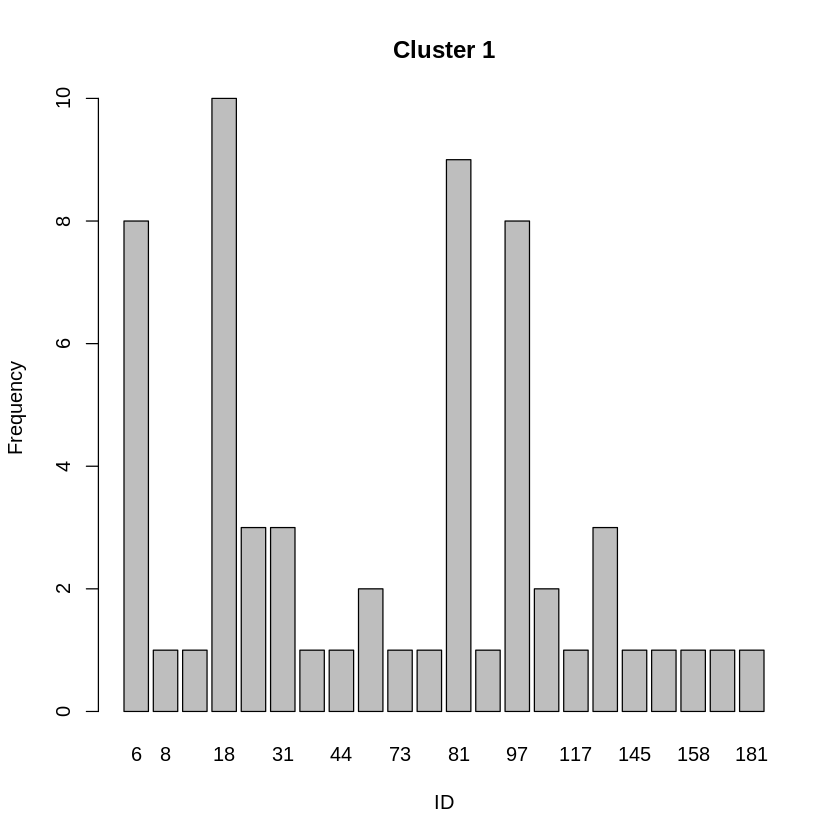

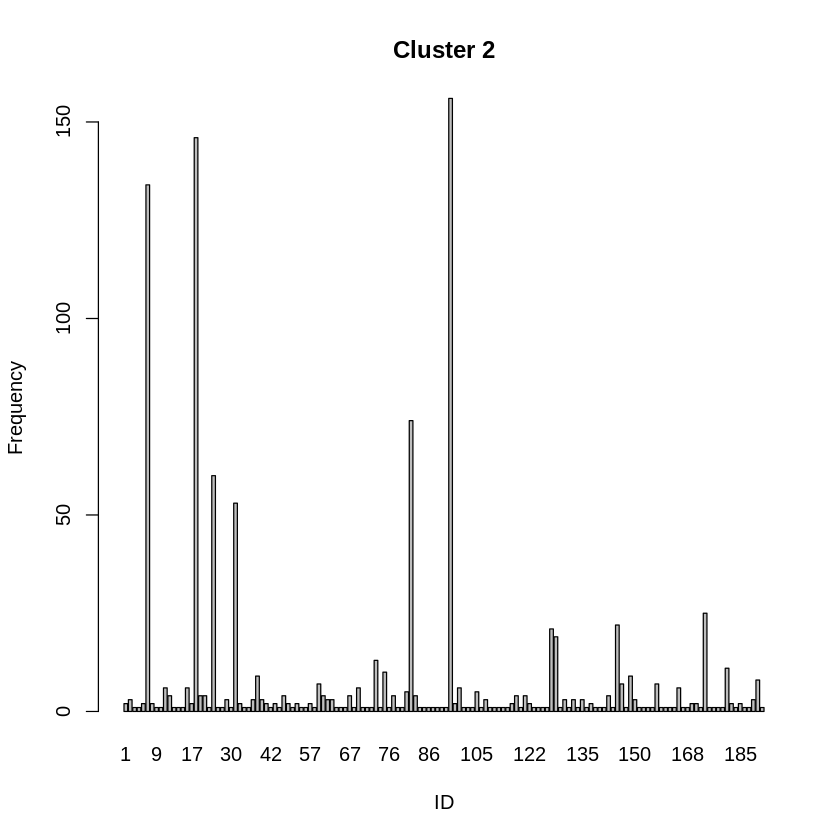

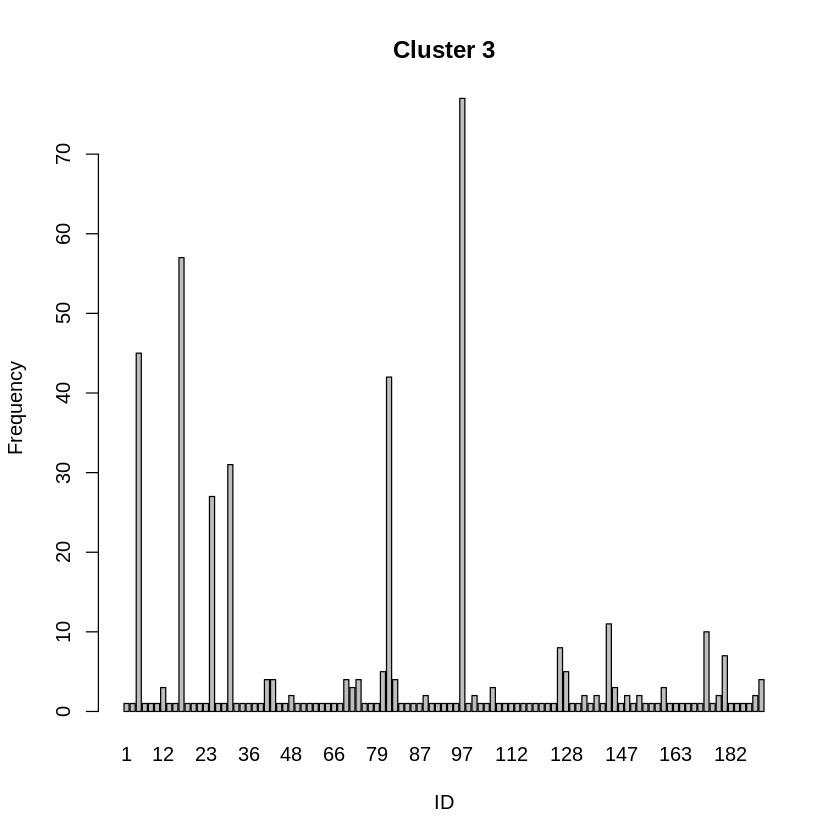

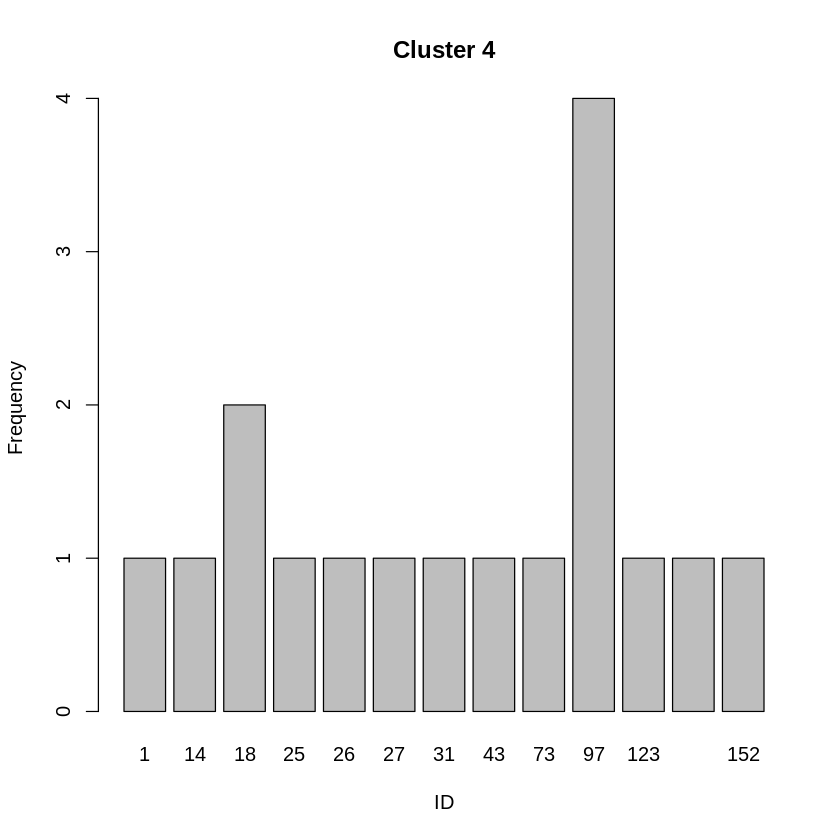

In [ ]:
id_frequencies <- xtabs(~ customer_user_id, data = cluster1)
id_frequencies2 <- xtabs(~ customer_user_id, data = cluster2)
id_frequencies3 <- xtabs(~ customer_user_id, data = cluster3)
id_frequencies4 <- xtabs(~ customer_user_id, data = cluster4)
barplot(id_frequencies, main = "Cluster 1", xlab = "ID", ylab = "Frequency")
barplot(id_frequencies2, main = "Cluster 2", xlab = "ID", ylab = "Frequency")
barplot(id_frequencies3, main = "Cluster 3", xlab = "ID", ylab = "Frequency")
barplot(id_frequencies4, main = "Cluster 4", xlab = "ID", ylab = "Frequency")

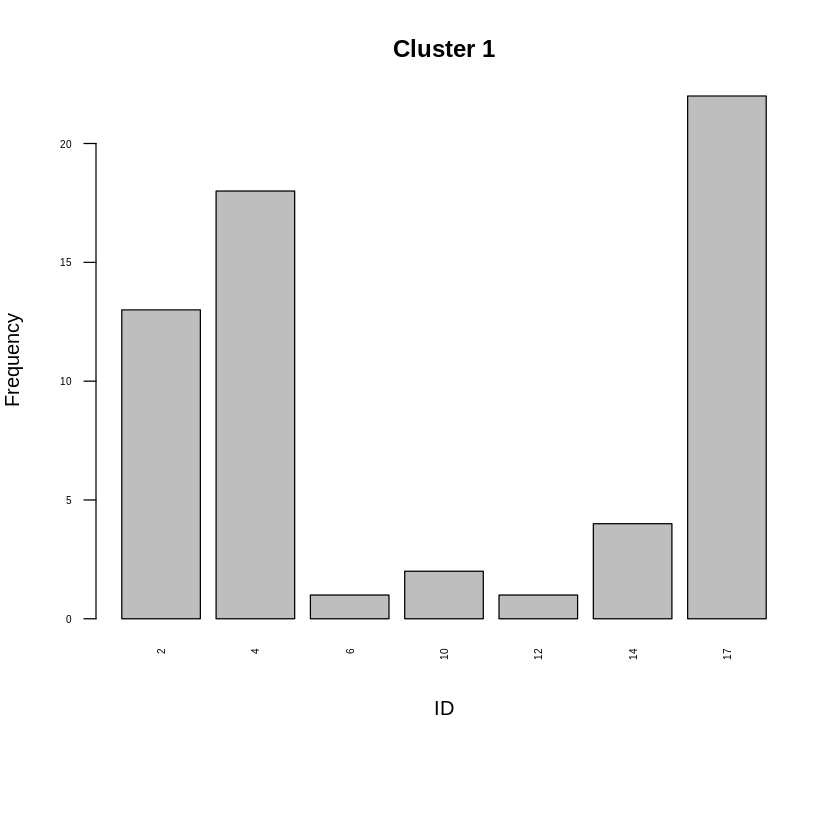

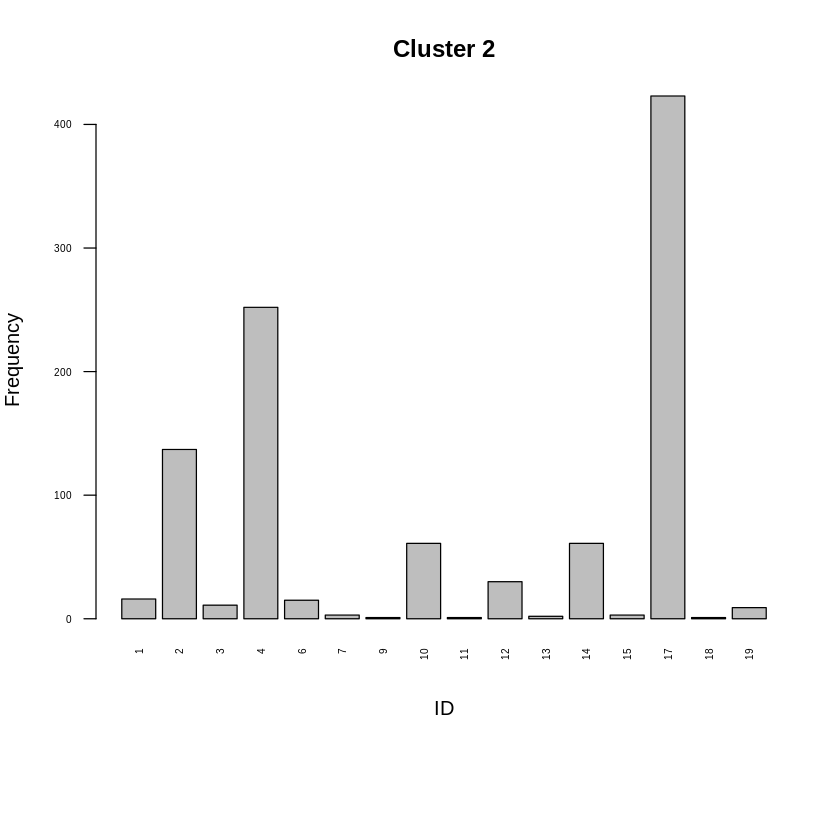

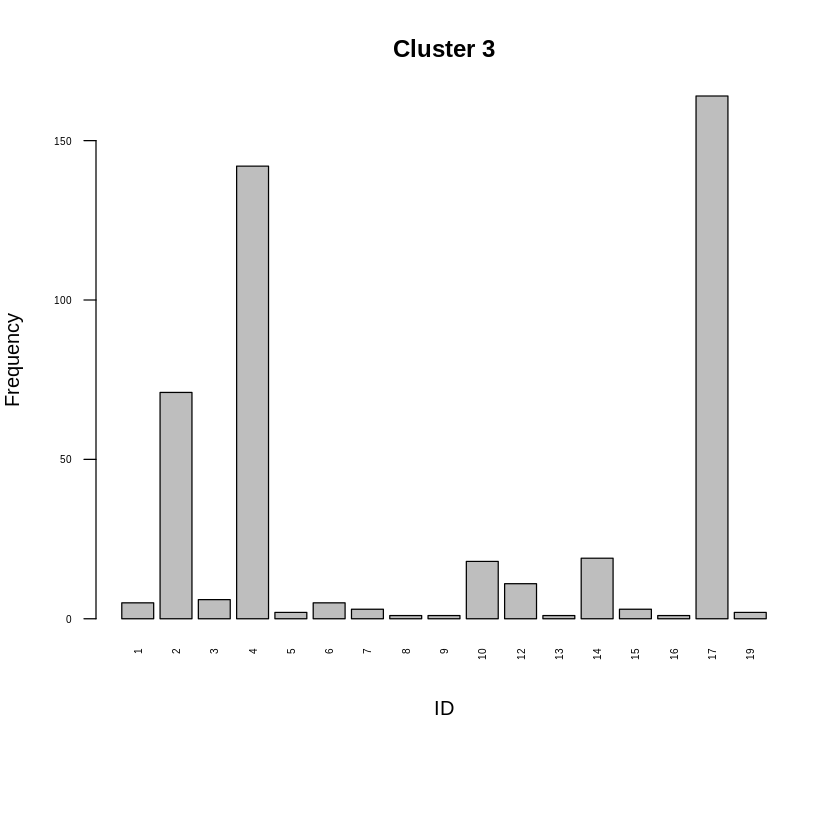

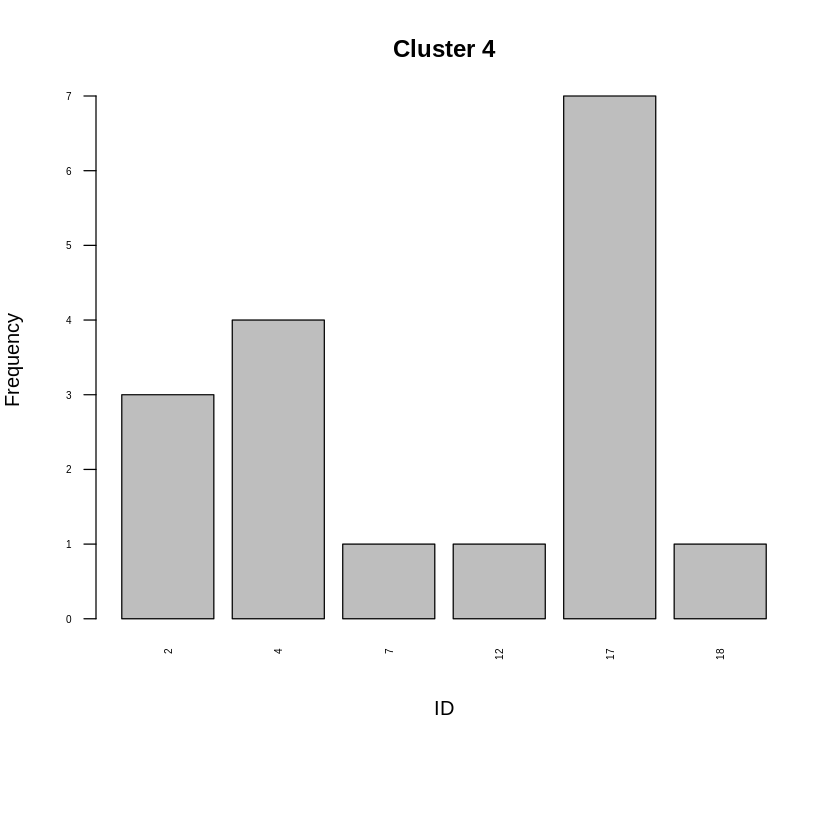

In [ ]:
id_frequencies <- xtabs(~ technician_user_id, data = cluster1)
id_frequencies2 <- xtabs(~ technician_user_id, data = cluster2)
id_frequencies3 <- xtabs(~ technician_user_id, data = cluster3)
id_frequencies4 <- xtabs(~ technician_user_id, data = cluster4)
par(las = 2, cex.axis = 0.5, mar = c(9, 4, 4, 2))
barplot(id_frequencies, main = "Cluster 1", xlab = "ID", ylab = "Frequency")
barplot(id_frequencies2, main = "Cluster 2", xlab = "ID", ylab = "Frequency")
barplot(id_frequencies3, main = "Cluster 3", xlab = "ID", ylab = "Frequency")
barplot(id_frequencies4, main = "Cluster 4", xlab = "ID", ylab = "Frequency")

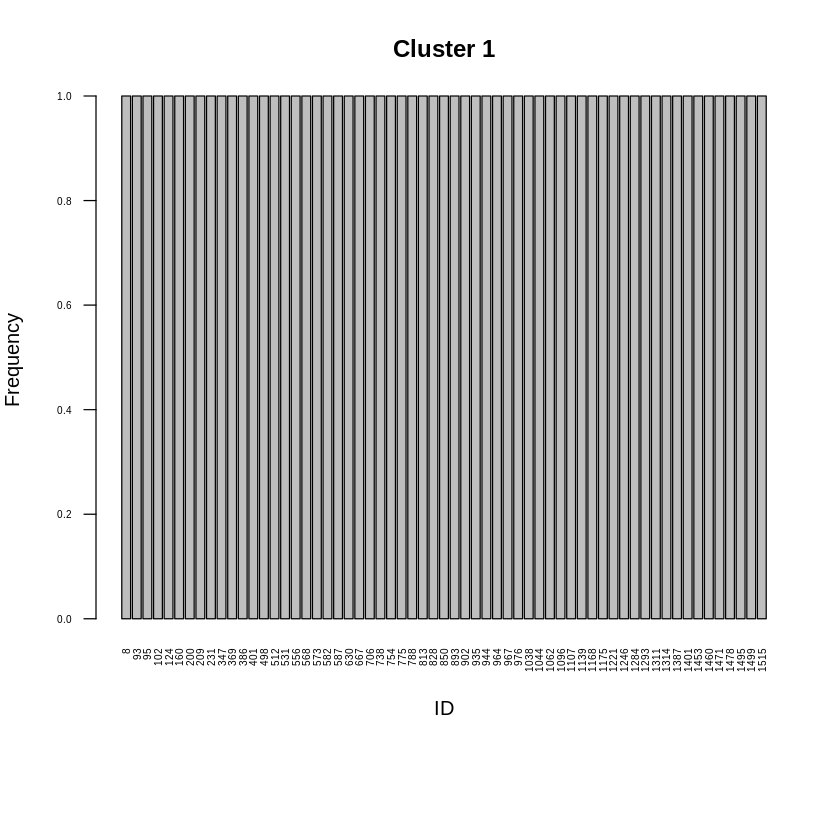

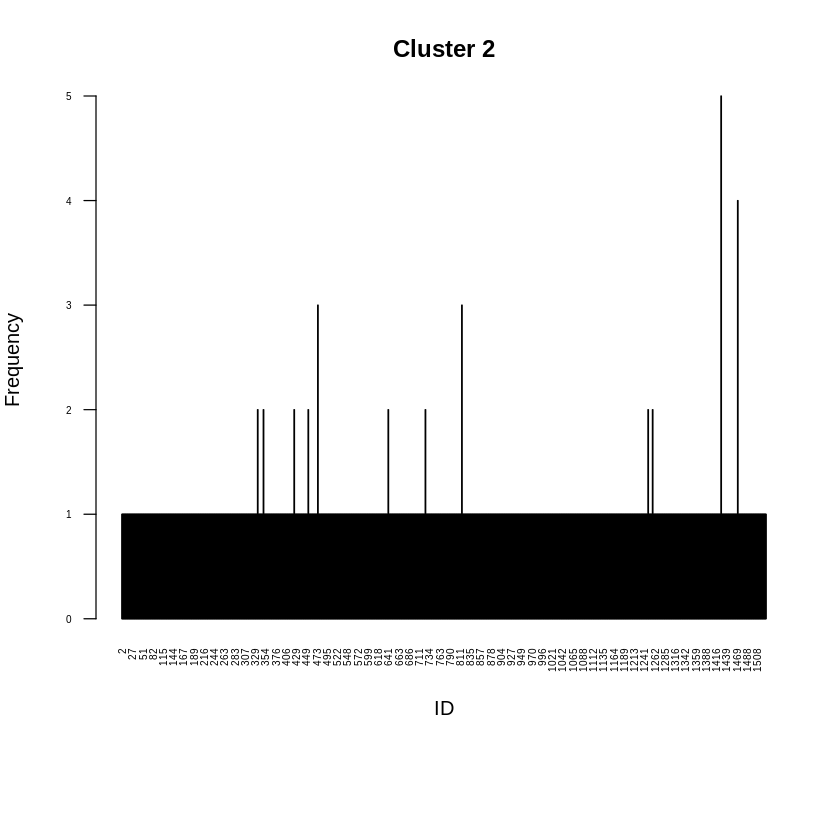

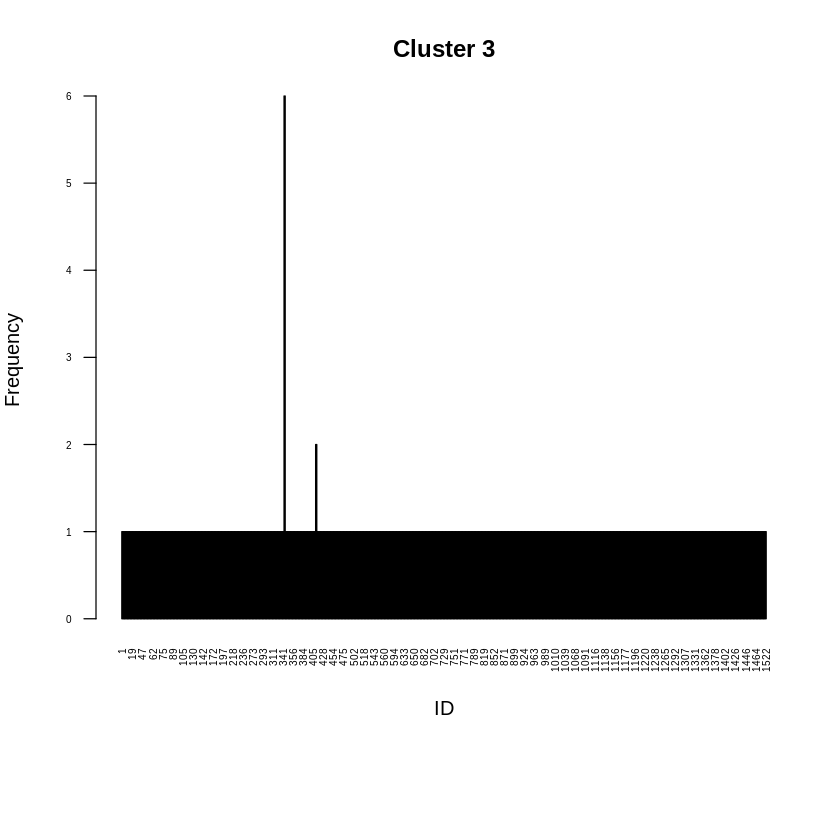

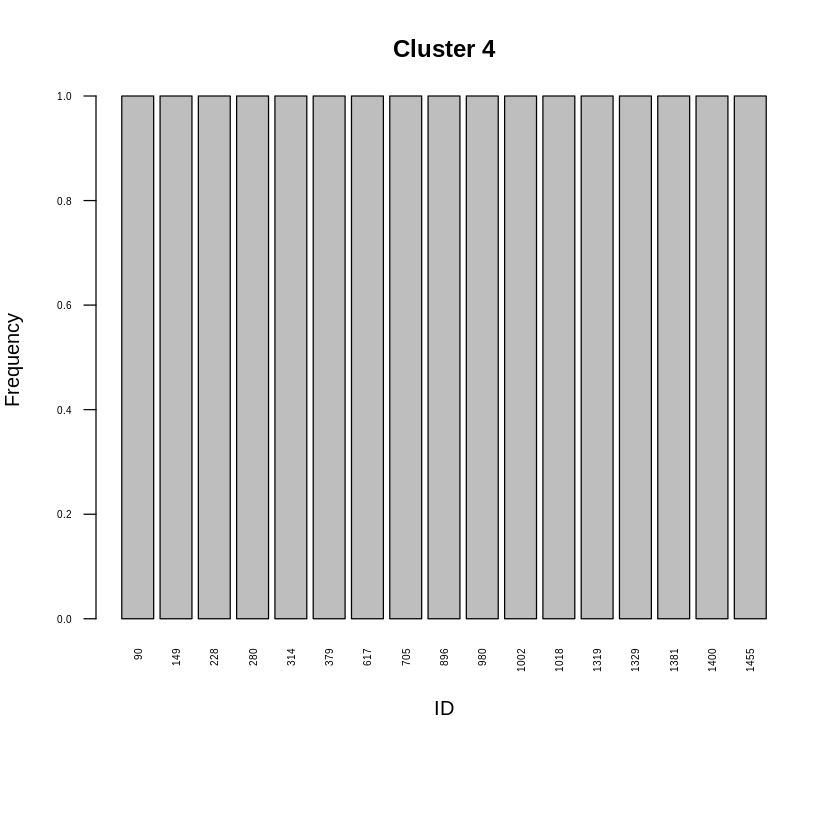

In [ ]:
id_frequencies <- xtabs(~ job_id, data = cluster1)
id_frequencies2 <- xtabs(~ job_id, data = cluster2)
id_frequencies3 <- xtabs(~ job_id, data = cluster3)
id_frequencies4 <- xtabs(~ job_id, data = cluster4)
par(las = 2, cex.axis = 0.5, mar = c(9, 4, 4, 2))
barplot(id_frequencies, main = "Cluster 1", xlab = "ID", ylab = "Frequency")
barplot(id_frequencies2, main = "Cluster 2", xlab = "ID", ylab = "Frequency")
barplot(id_frequencies3, main = "Cluster 3", xlab = "ID", ylab = "Frequency")
barplot(id_frequencies4, main = "Cluster 4", xlab = "ID", ylab = "Frequency")

# Scatter Visualization

## Direct Visualization

### Total Amount

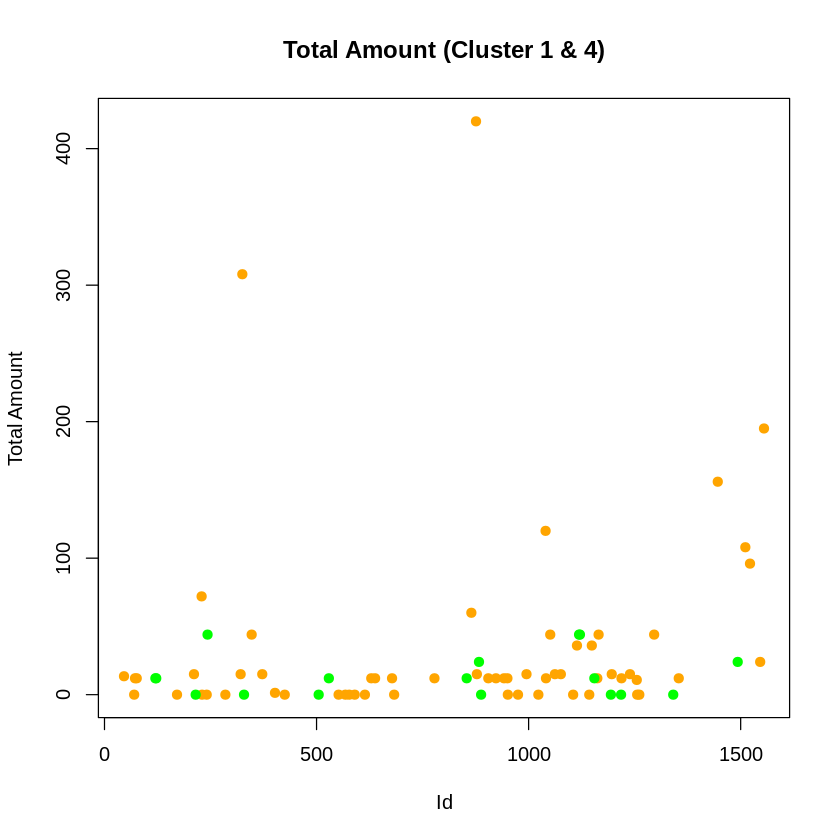

In [ ]:
# Total Amount Plot for clusters 1 & 4
plot(cluster1$X_id,cluster1$total_amount,main="Total Amount (Cluster 1 & 4)",xlab="Id",ylab="Total Amount",type="p",pch=19,col="orange")
points(cluster4$X_id,cluster4$total_amount,pch=19,col="green")

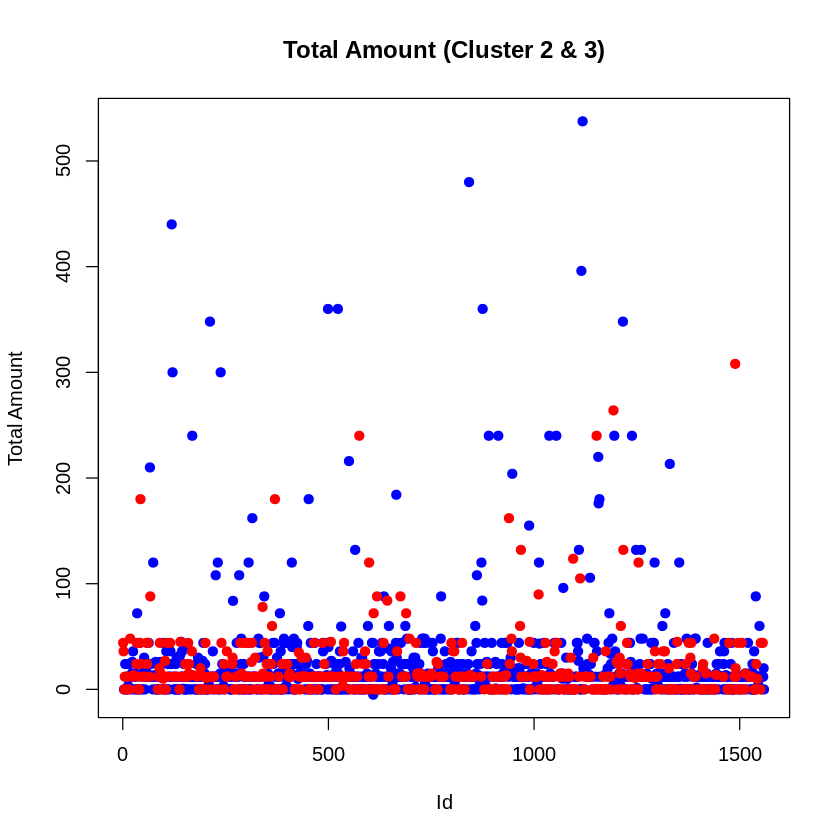

In [ ]:
plot(cluster2$X_id,cluster2$total_amount,main="Total Amount (Cluster 2 & 3)",xlab="Id",ylab="Total Amount", type="p",pch=19,col="blue")
points(cluster3$X_id,cluster3$total_amount,pch=19,col="red")

### Commision

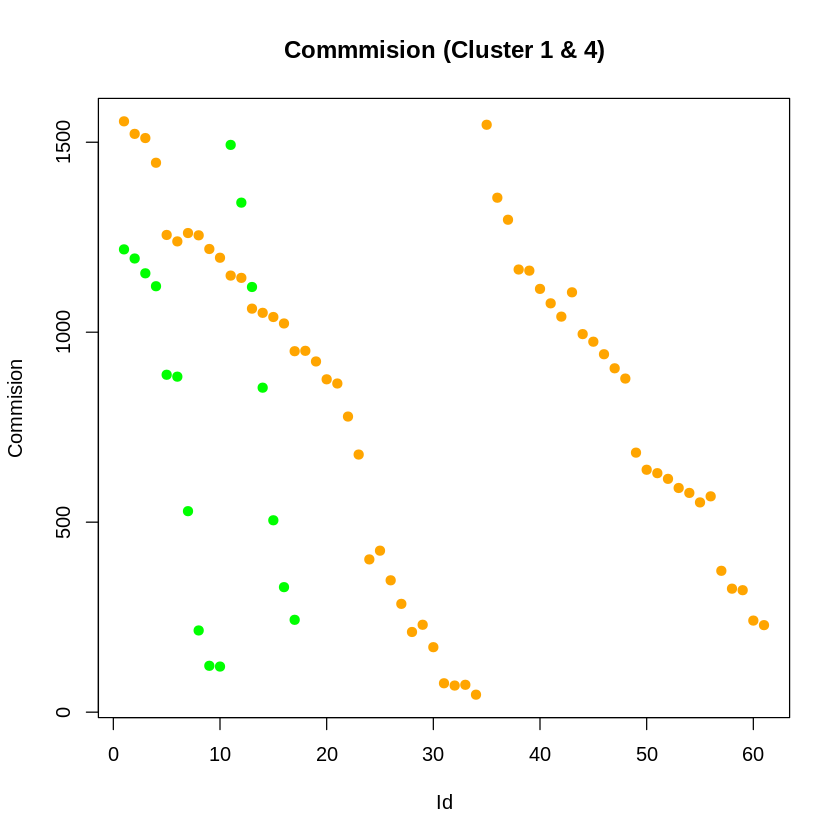

In [ ]:
# Commision Plot for clusters 1 & 4
plot(cluster1$X_id,cluster1$commmision,main="Commmision (Cluster 1 & 4)",xlab="Id",ylab="Commision",type="p",pch=19,col="orange")
points(cluster4$X_id,cluster4$commmision,pch=19,col="green")

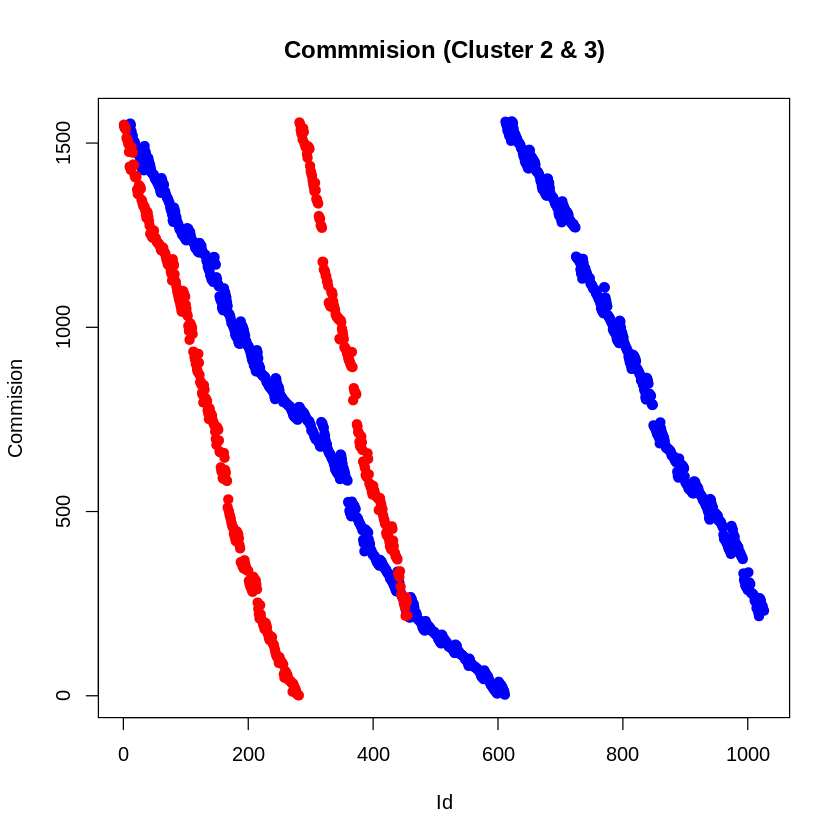

In [ ]:
plot(cluster2$X_id,cluster2$commmision,main="Commmision (Cluster 2 & 3)",xlab="Id",ylab="Commision",type="p",pch=19,col="blue")
points(cluster3$X_id,cluster3$commmision,pch=19,col="red")

### Amount earned

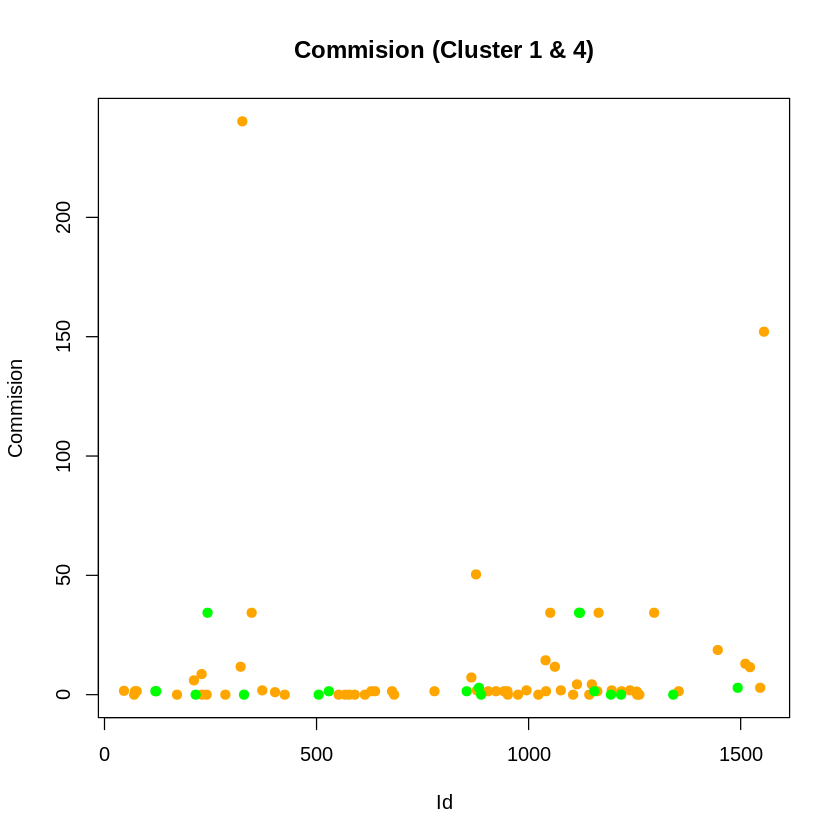

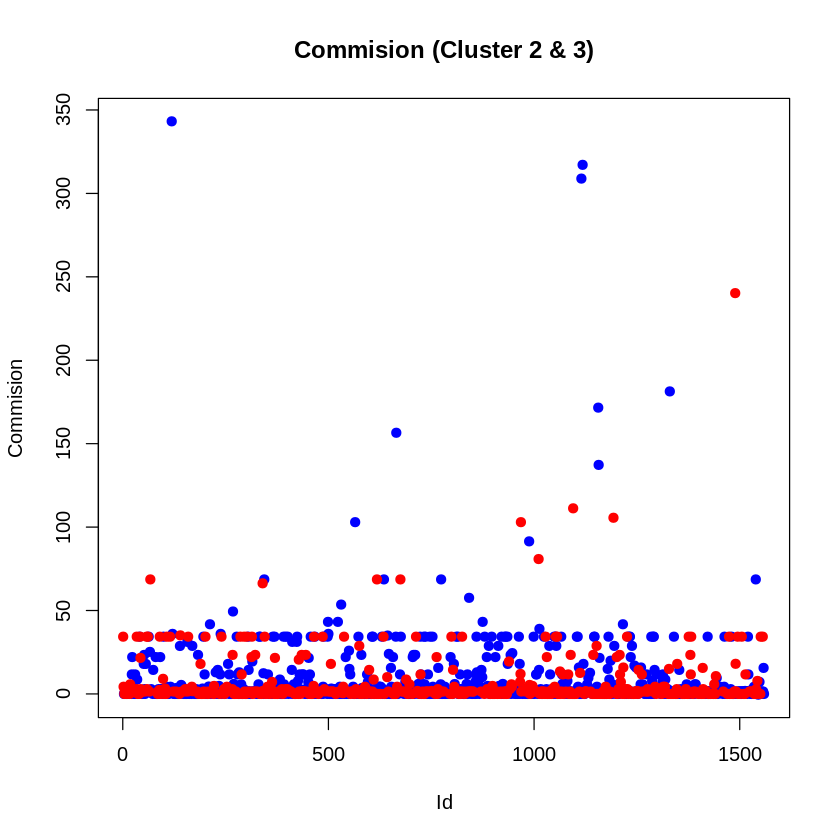

In [ ]:
# Commision Plot
plot(cluster1$X_id,cluster1$amount_earned,main="Commision (Cluster 1 & 4)",xlab="Id",ylab="Commision",type="p",pch=19,col="orange")
points(cluster4$X_id,cluster4$amount_earned,pch=19,col="green")

plot(cluster2$X_id,cluster2$amount_earned,main="Commision (Cluster 2 & 3)",xlab="Id",ylab="Commision",type="p",pch=19,col="blue")
points(cluster3$X_id,cluster3$amount_earned,pch=19,col="red")

## Comparison Visualization

### Total amount/Commision

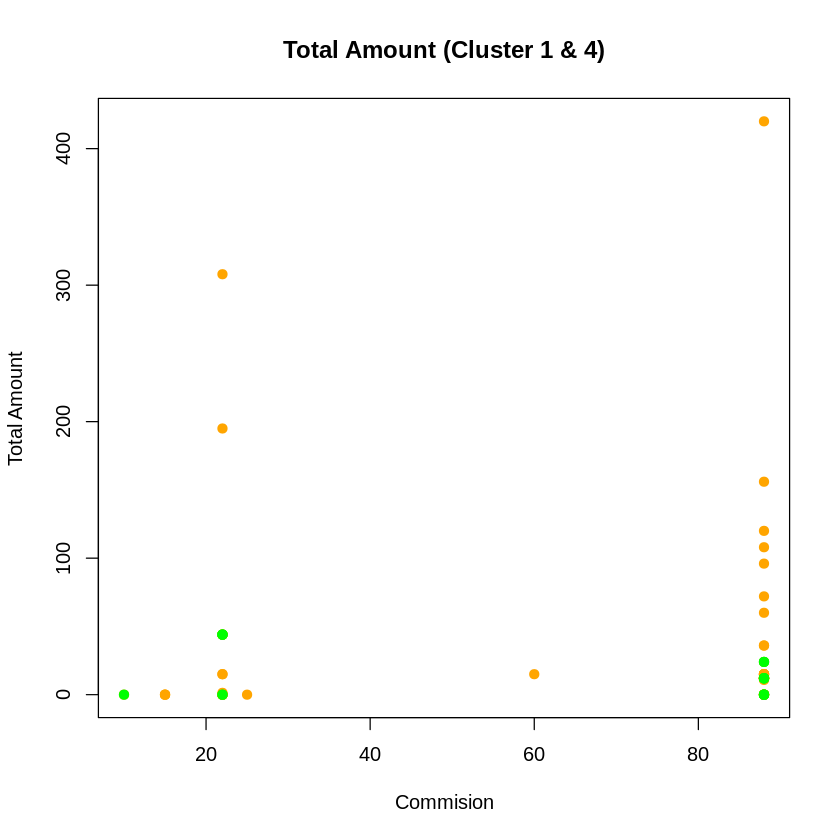

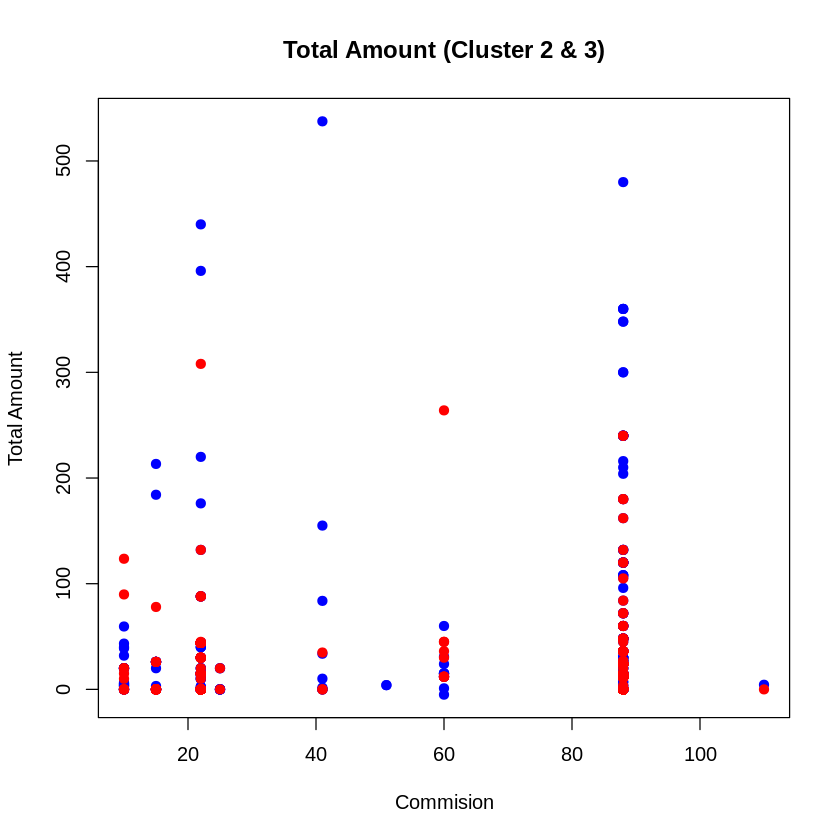

In [ ]:
# Total Amount Plot
plot(cluster1$commision,cluster1$total_amount,main="Total Amount/Commision (Cluster 1 & 4)",xlab="Commision",ylab="Total Amount",type="p",pch=19,col="orange")
points(cluster4$commision,cluster4$total_amount,pch=19,col="green")

plot(cluster2$commision,cluster2$total_amount,main="Total Amount/Commision (Cluster 2 & 3)",xlab="Commision",ylab="Total Amount", type="p",pch=19,col="blue")
points(cluster3$commision,cluster3$total_amount,pch=19,col="red")

### Commision/Amount earned

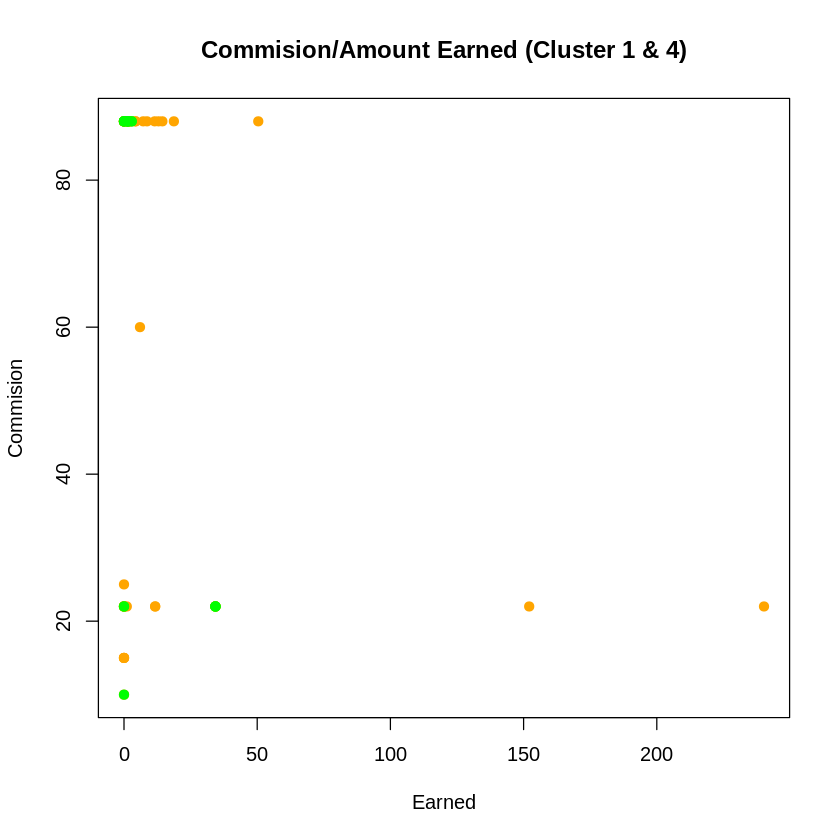

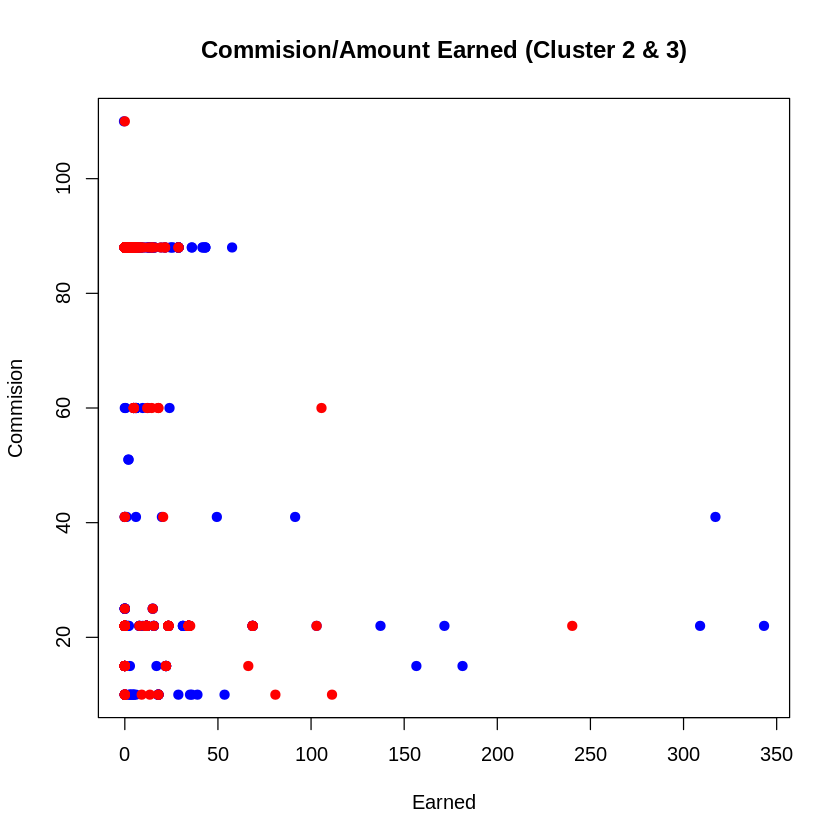

In [ ]:
# Total Amount Plot for clusters 1 & 4
plot(cluster1$amount_earned,cluster1$commision,main="Commision/Amount Earned (Cluster 1 & 4)",xlab="Earned",ylab="Commision",type="p",pch=19,col="orange")
points(cluster4$amount_earned,cluster4$commision,pch=19,col="green")

plot(cluster2$amount_earned,cluster2$commision,main="Commision/Amount Earned (Cluster 2 & 3)",xlab="Earned",ylab="Commision", type="p",pch=19,col="blue")
points(cluster3$amount_earned,cluster3$commision,pch=19,col="red")

### Total amount/Amount earned

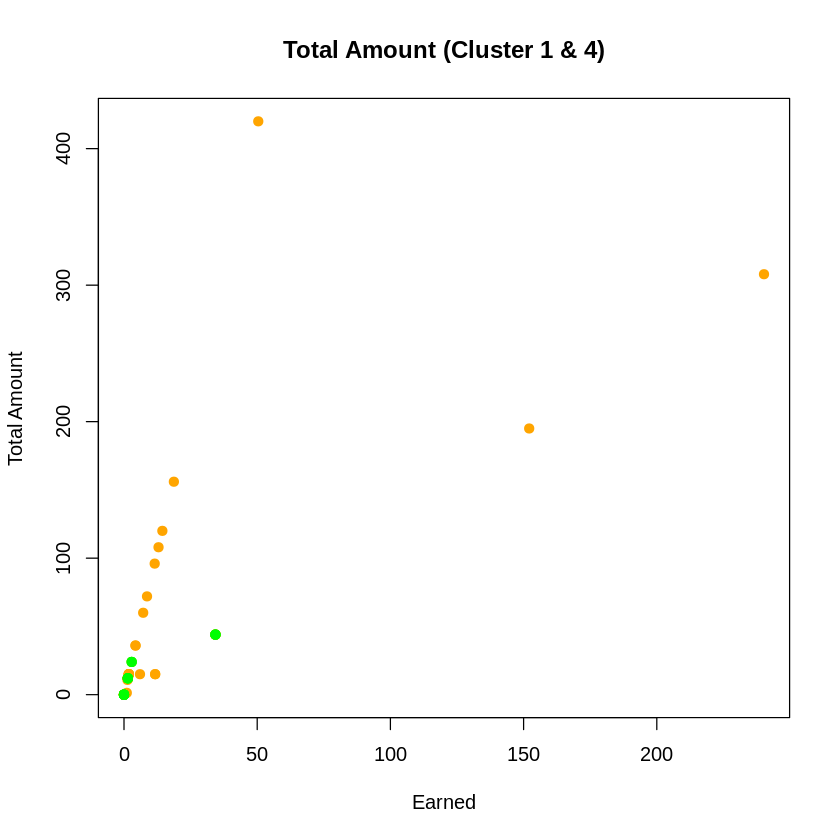

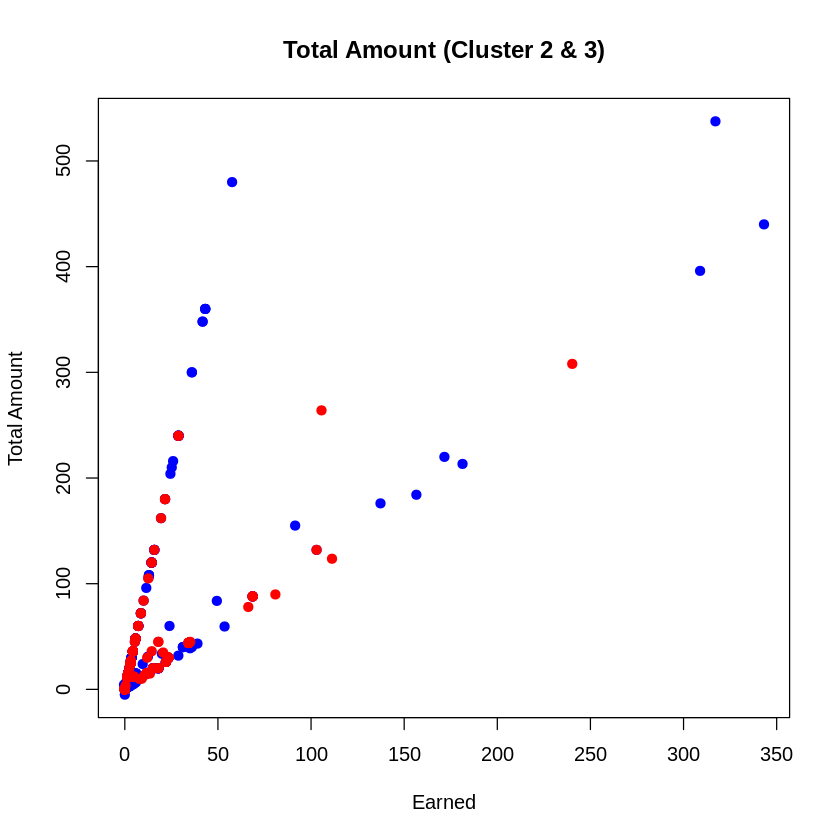

In [ ]:
# Total Amount/Amount earned Plot
plot(cluster1$amount_earned,cluster1$total_amount,main="Total Amount (Cluster 1 & 4)",xlab="Earned",ylab="Total Amount",type="p",pch=19,col="orange")
points(cluster4$amount_earned,cluster4$total_amount,pch=19,col="green")

plot(cluster2$amount_earned,cluster2$total_amount,main="Total Amount (Cluster 2 & 3)",xlab="Earned",ylab="Total Amount", type="p",pch=19,col="blue")
points(cluster3$amount_earned,cluster3$total_amount,pch=19,col="red")

## Customer Visualization

### Customer/Total amount

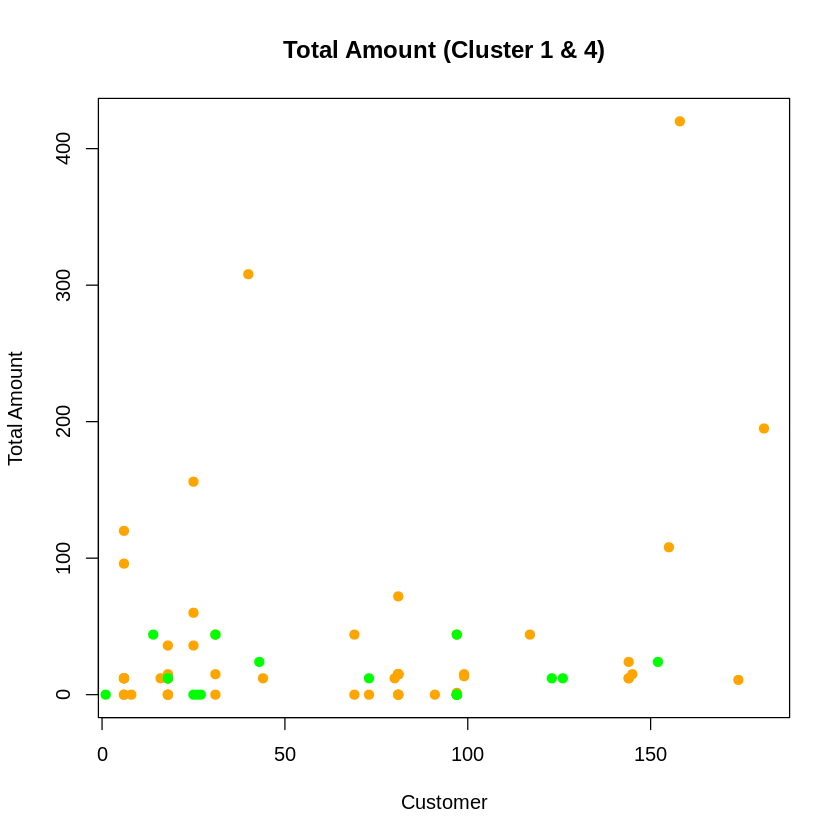

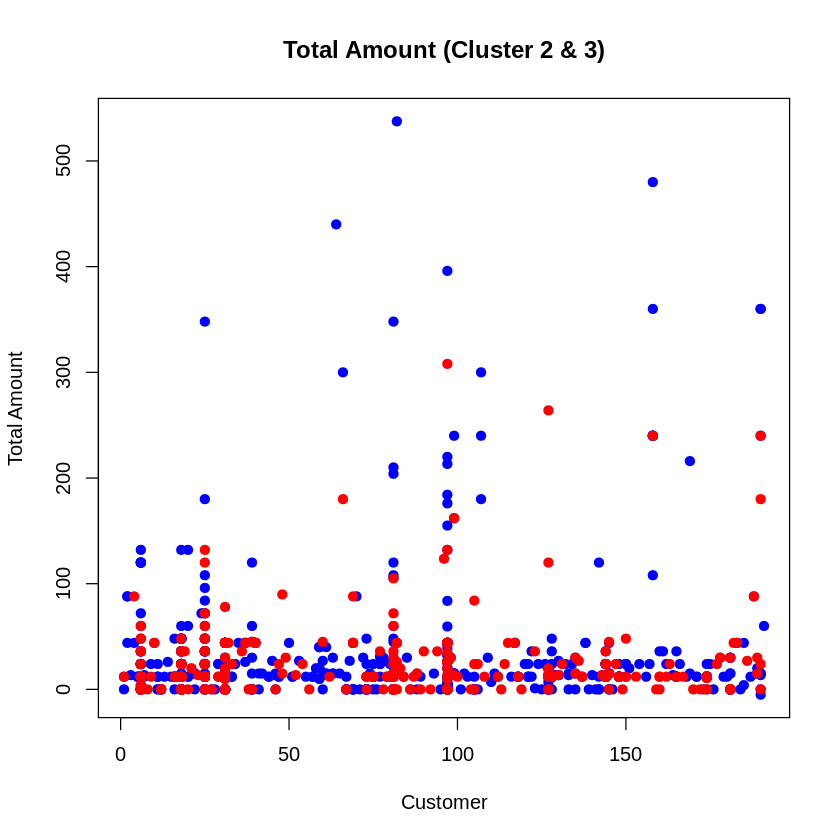

In [ ]:
# Customer/Total Amount Plot
plot(cluster1$customer_user_id,cluster1$total_amount,main="Total Amount (Cluster 1 & 4)",xlab="Customer",ylab="Total Amount",type="p",pch=19,col="orange")
points(cluster4$customer_user_id,cluster4$total_amount,pch=19,col="green")

plot(cluster2$customer_user_id,cluster2$total_amount,main="Total Amount (Cluster 2 & 3)",xlab="Customer",ylab="Total Amount", type="p",pch=19,col="blue")
points(cluster3$customer_user_id,cluster3$total_amount,pch=19,col="red")

### Customer/Amount Earned

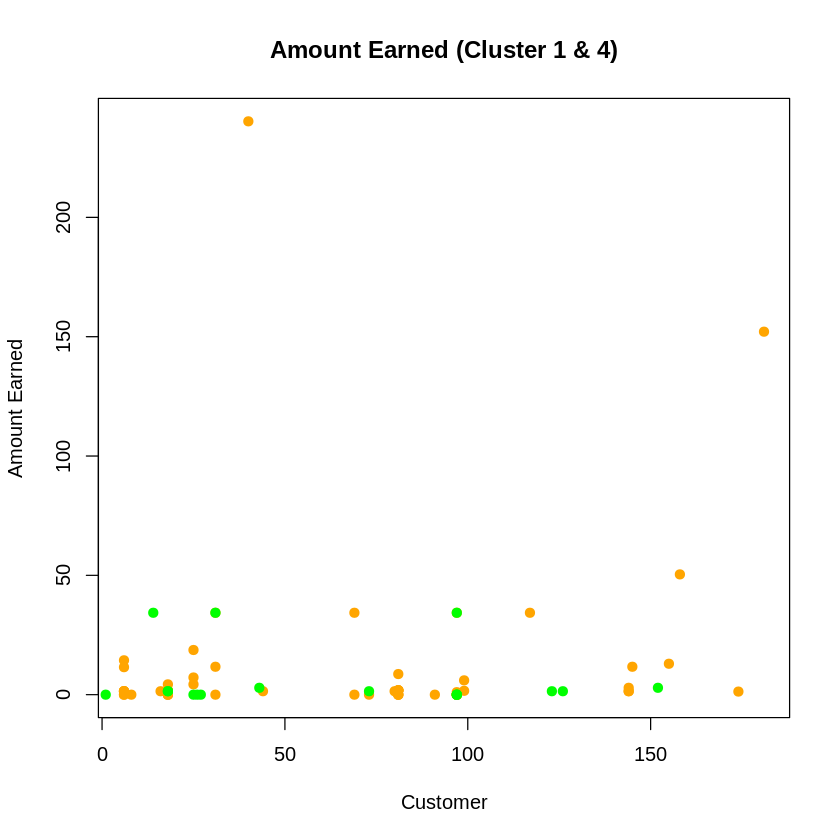

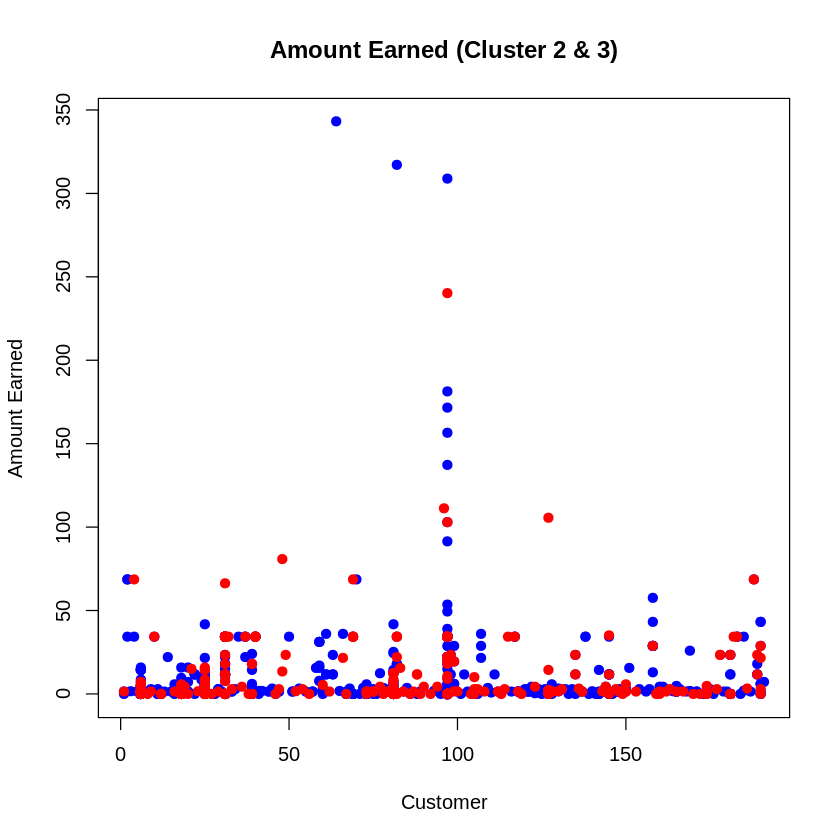

In [ ]:
# Customer/Amount earned Plot
plot(cluster1$customer_user_id,cluster1$amount_earned,main="Amount Earned (Cluster 1 & 4)",xlab="Customer",ylab="Amount Earned",type="p",pch=19,col="orange")
points(cluster4$customer_user_id,cluster4$amount_earned,pch=19,col="green")

plot(cluster2$customer_user_id,cluster2$amount_earned,main="Amount Earned (Cluster 2 & 3)",xlab="Customer",ylab="Amount Earned", type="p",pch=19,col="blue")
points(cluster3$customer_user_id,cluster3$amount_earned,pch=19,col="red")

### Customer/Commision

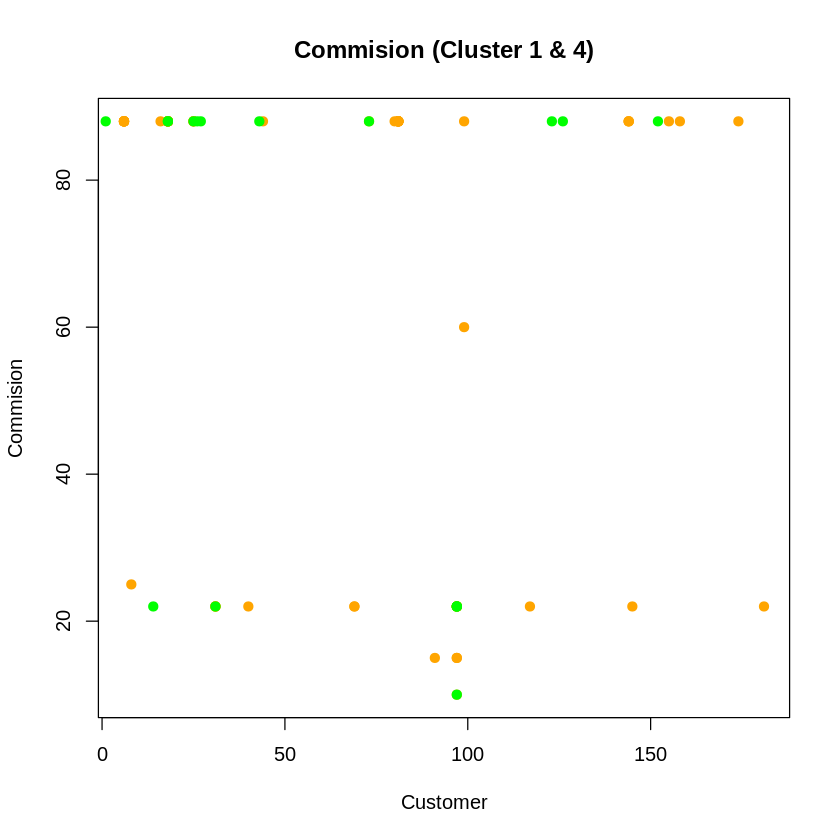

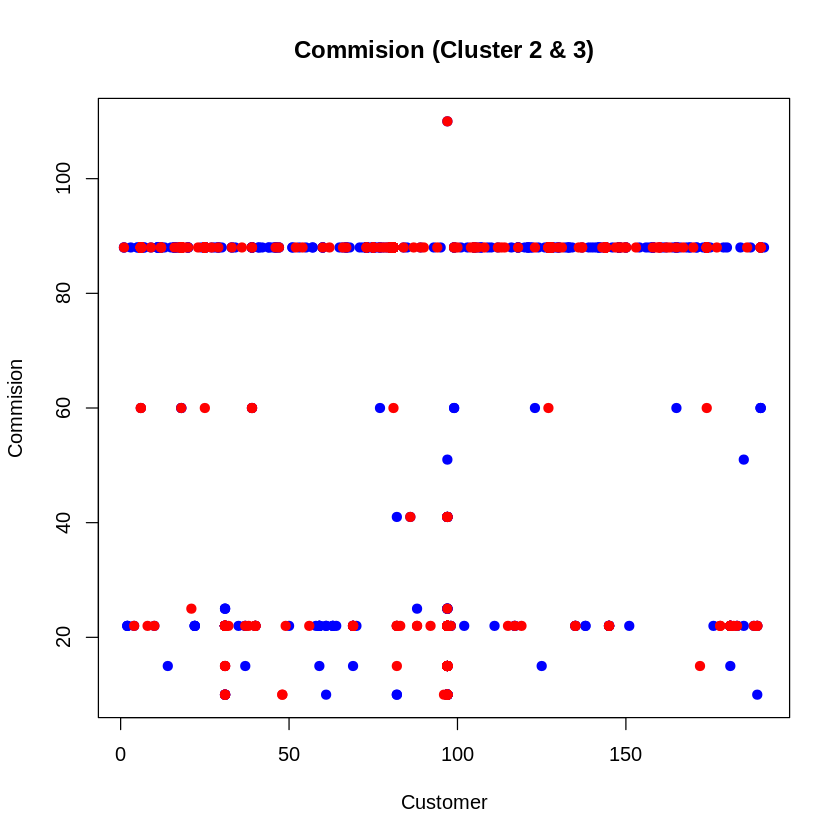

In [ ]:
# Customer/Commision Plot
plot(cluster1$customer_user_id,cluster1$commision,main="Commision (Cluster 1 & 4)",xlab="Customer",ylab="Commision",type="p",pch=19,col="orange")
points(cluster4$customer_user_id,cluster4$commision,pch=19,col="green")

plot(cluster2$customer_user_id,cluster2$commision,main="Commision (Cluster 2 & 3)",xlab="Customer",ylab="Commision", type="p",pch=19,col="blue")
points(cluster3$customer_user_id,cluster3$commision,pch=19,col="red")

## Technician Visualization

### Technician/Commision Plot

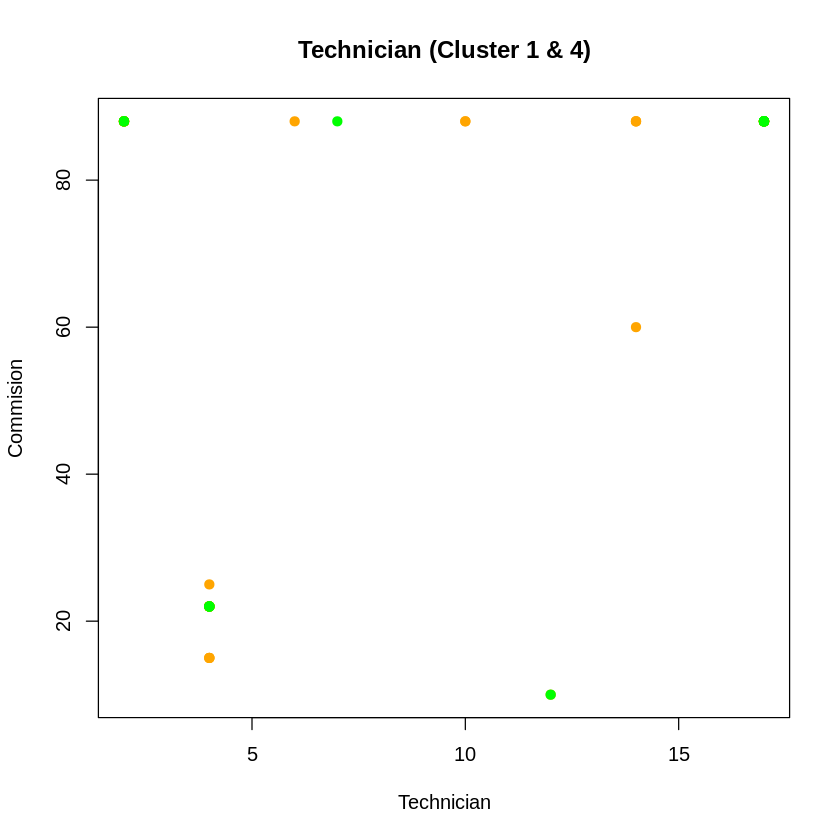

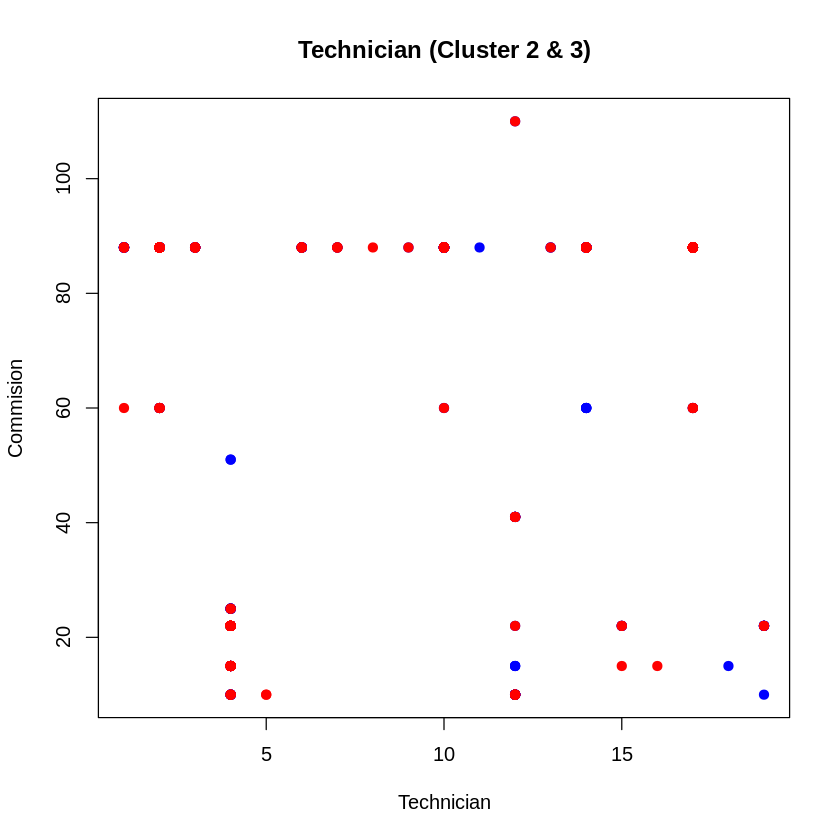

In [ ]:
# Technician/Commision Plot
plot(cluster1$technician_user_id,cluster1$commision,main="Technician (Cluster 1 & 4)",xlab="Technician",ylab="Commision",type="p",pch=19,col="orange")
points(cluster4$technician_user_id,cluster4$commision,pch=19,col="green")

plot(cluster2$technician_user_id,cluster2$commision,main="Technician (Cluster 2 & 3)",xlab="Technician",ylab="Commision", type="p",pch=19,col="blue")
points(cluster3$technician_user_id,cluster3$commision,pch=19,col="red")

### Technician/Total amount Plot

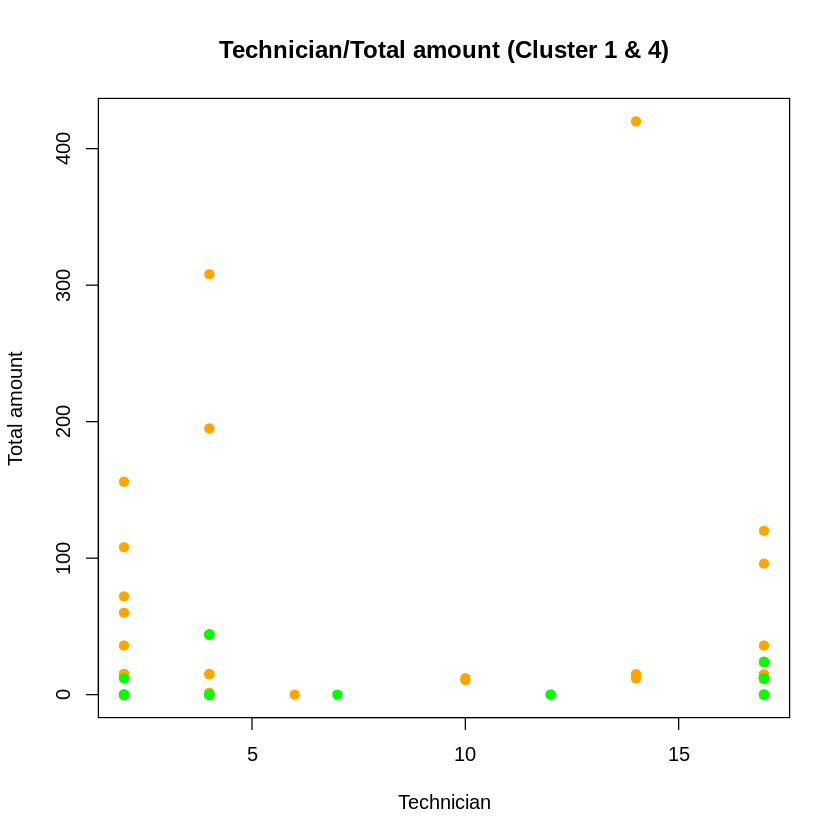

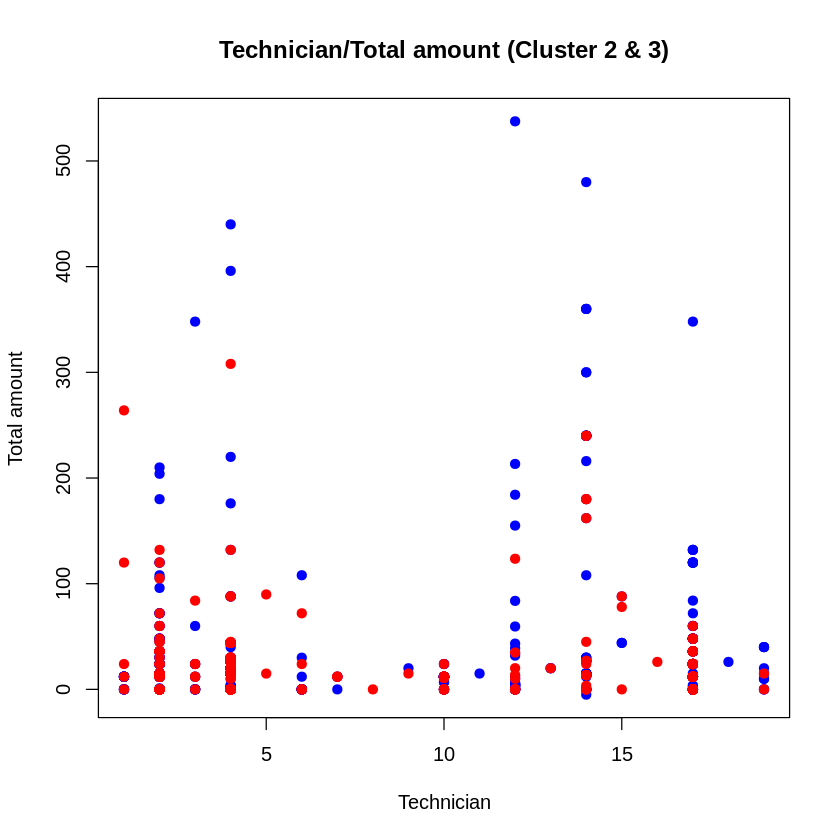

In [ ]:
# Technician/Total amount Plot
plot(cluster1$technician_user_id,cluster1$total_amount,main="Technician/Total amount (Cluster 1 & 4)",xlab="Technician",ylab="Total amount",type="p",pch=19,col="orange")
points(cluster4$technician_user_id,cluster4$total_amount,pch=19,col="green")

plot(cluster2$technician_user_id,cluster2$total_amount,main="Technician/Total amount (Cluster 2 & 3)",xlab="Technician",ylab="Total amount", type="p",pch=19,col="blue")
points(cluster3$technician_user_id,cluster3$total_amount,pch=19,col="red")

### Technician/Amount Earned Plot

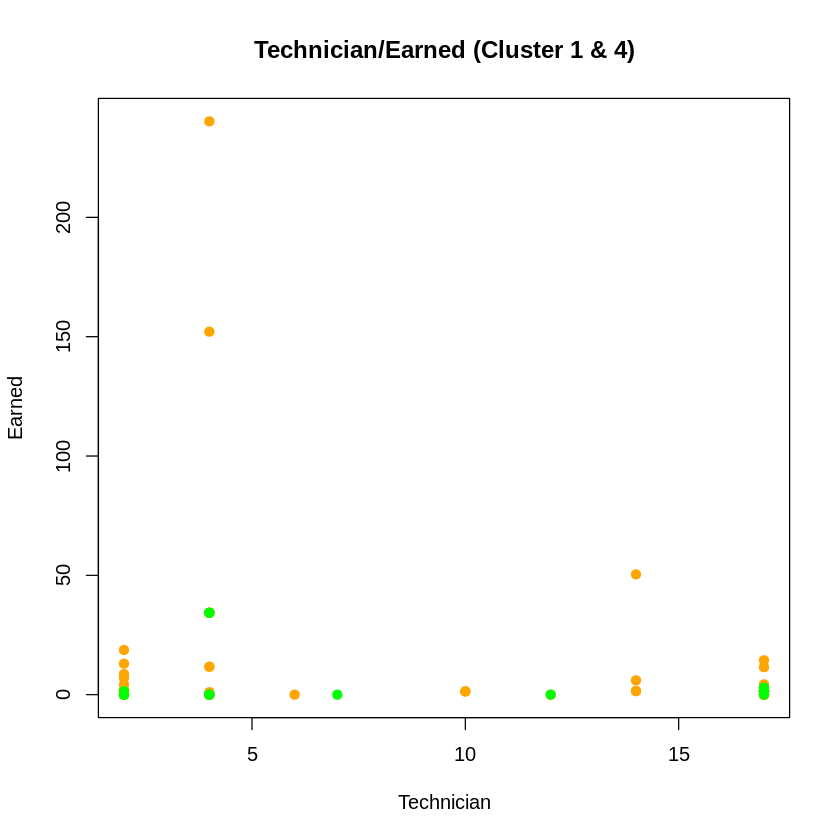

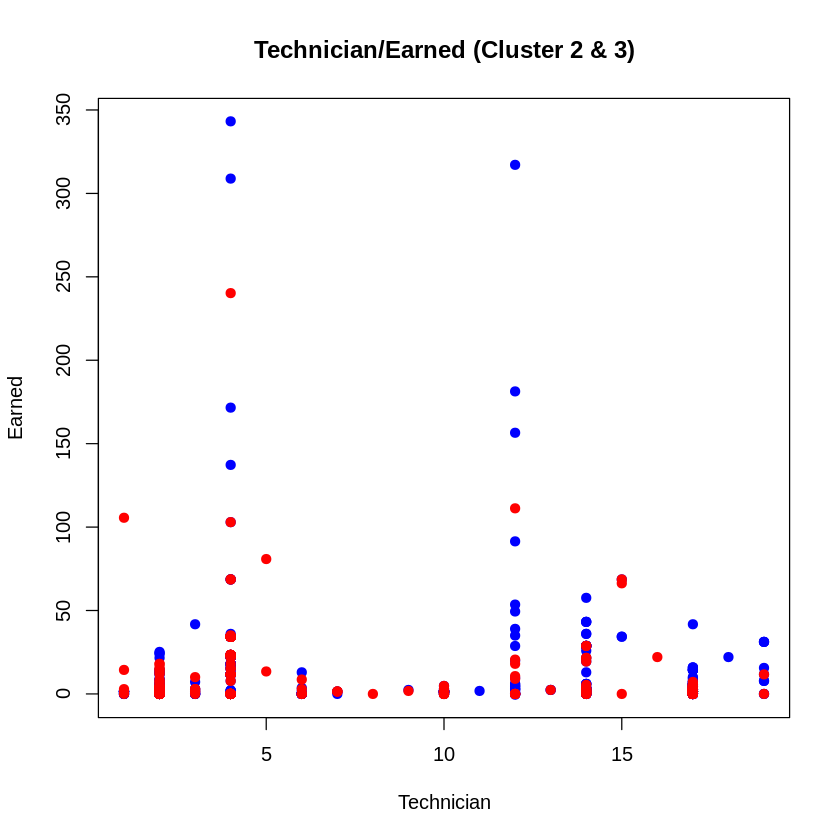

In [ ]:
# Technician/Amount Earned Plot
plot(cluster1$technician_user_id,cluster1$amount_earned,main="Technician/Earned (Cluster 1 & 4)",xlab="Technician",ylab="Earned",type="p",pch=19,col="orange")
points(cluster4$technician_user_id,cluster4$amount_earned,pch=19,col="green")

plot(cluster2$technician_user_id,cluster2$amount_earned,main="Technician/Earned (Cluster 2 & 3)",xlab="Technician",ylab="Earned", type="p",pch=19,col="blue")
points(cluster3$technician_user_id,cluster3$amount_earned,pch=19,col="red")